

# Project Investigate a Dataset - Medical Appointment No Shows
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>


# Part I: Introduction


This dataset compiles information from 100,000 medical appointments in Brazil, primarily focusing on patient attendance. In each record, we find an array of patient attributes and appointment details.

- **PatientId**: This is a unique identifier assigned to each patient. Duplicate entries exist for cases where a patient has scheduled multiple appointments.

- **AppointmentID**: Each appointment is associated with a distinct identifier to ensure its uniqueness.

- **Gender**: We have information about the gender of the patient, recorded as 'M' for males and 'F' for females.

- **ScheduledDay**: This field captures the date and time when the patient initiated the appointment scheduling process.

- **AppointmentDay**: This attribute logs the date and time when the patient initially contacted the facility to book the appointment.

- **Age**: Here, we note the patient's age.

- **Neighborhood**: This field specifies the location of the hospital or healthcare facility where the appointment is scheduled to take place.

- **Scholarship**: It indicates whether the patient is enrolled in the Brazilian welfare program known as Bolsa Família.

- **Hypertension**: We have information on whether the patient is currently dealing with hypertension.

- **Diabetes**: This attribute indicates whether the patient is actively managing diabetes.

- **Alcoholism**: We document whether the patient is experiencing issues related to alcoholism.

- **Handicap**: This field reflects whether the patient has any special needs or disabilities.

- **SMS_received**: It documents whether the patient has received a reminder text message in advance of the appointment.

- **Show-up**: This field provides a binary answer, with 'No' indicating the patient attended the appointment and 'Yes' suggesting a no-show.


# 1.1 Question Want to know 

What is the overall attendance rate for medical appointments in this dataset?

This question focuses on the general attendance behavior of patients.
Does gender influence appointment attendance?

You can investigate whether there is a gender-based difference in appointment attendance.
Is there a relationship between receiving SMS reminders and appointment attendance?

Explore if patients who receive SMS reminders are more likely to attend their appointments.


In [2]:
pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.8.0-cp311-cp311-win_amd64.whl (7.6 MB)
Using cached contourpy-1.1.1-cp311-cp311-win_amd64.whl (480 kB)
Using cached cycler


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.6 kB 469.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.6 kB 722.1 kB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>

# Part II: Data Wrangling

The data columns in question consist of raw data along with accompanying information. These columns contain various types of data, which could include numerical values, text, dates, or categorical information. The specific content and data type within each column can vary depending on the dataset and its purpose.



## 1. Basic Characteristics (Size of the dataset, number of columns and rows, types of data)

In [6]:
df = pd.read_csv('datasetsnoshowappointments-kagglev2-may-2016.csv.csv')
df.head(6)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5  9.598513e+13        5626772      F  2016-04-27T08:36:51Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
5  2016-04-29T00:00:00Z   76          REPÚBLICA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No  
5         0           0        0             0      No

In [7]:
df.shape

(110527, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset includes 14 columns and 110527 data rows.

The dataset comprises 110,527 rows (entries) and includes 14 columns (variables). 
The data types vary, with one column being of float64 type, eight columns being of int64 type, 
and five columns being of object type. Approximately 11.8 megabytes of memory are used to store this data. These data seem to be related to patient details, medical appointment scheduling, medical conditions, and whether patients showed up for their appointments or not.






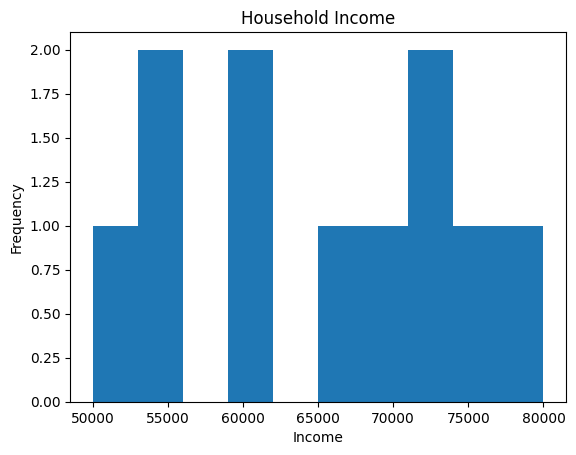

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram(df, column, title, xlabel, ylabel, bins=10):
    plt.hist(df[column], bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Sample data
data = {
    'Income': [50000, 60000, 75000, 55000, 70000, 65000, 80000, 60000, 55000, 72000, 71000],
}
# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Example usage to create a histogram for the "Income" column
plot_histogram(df, "Income", "Household Income", "Income", "Frequency", bins=10)

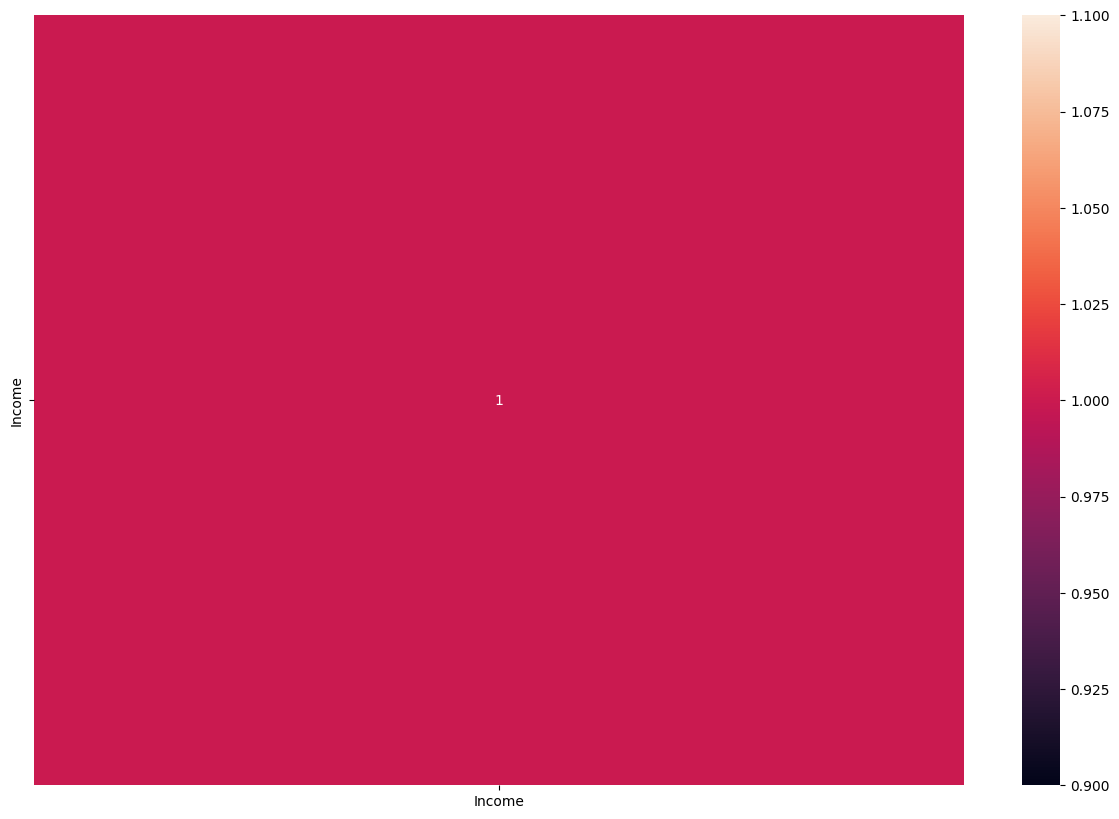

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

Upon observing the heatmap, it appears there's a correlation between Age and Hypertension, and a somewhat weaker correlation between Hypertension and Diabetes. In the upcoming sections, we'll delve deeper into our analysis to validate these initial insights.

Reviewing the charts provided, we can see that the dataset contains two fundamental data types:

A. Categorical Data: Gender, Diabetes, Alcoholism, Handcap, SMS_received, No-show.
B. Quantitative Data: PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay.

In the following section, we'll precisely categorize each column and establish a well-defined approach for analyzing the data within each of these categories.

## 2. Data Quality Assessment
### 2.1 Verification of Missing Data

In [390]:
# Check if there is any missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The above cell indicates the absence of any missing values.

### 2.2 Confirmation of Duplicate Data Entries

In [391]:
# Check for duplicate rows 
df.duplicated().sum()

0

In [392]:
# Check for duplicate appointmentID
sum(df.AppointmentID.duplicated())

0

The cell above demonstrates that there are no duplicates found in the AppointmentID column.

In [393]:
sum(df.PatientId.duplicated())

48228

In [394]:
df.PatientId.value_counts().head(5)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
Name: PatientId, dtype: int64

These numbers represent the top five most common Patient IDs in the dataset, along with the frequency of each ID occurrence. The Patient ID "8.221459e+14" appears most frequently with 88 occurrences, followed by "9.963767e+10" with 84 occurrences, "2.688613e+13" with 70 occurrences, "3.353478e+13" with 65 occurrences, and "2.584244e+11" with 62 occurrences. This information helps identify the patients with the highest appointment frequencies in the dataset, which can be valuable for further analysis or targeted interventions if needed.

### 2.3 Assessment of Inaccurate Data (Considering the specific characteristics of each column)

In [395]:
# Check for zero/negative AppointmentID
df[df.AppointmentID < 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [396]:
# Check for zero/negative PatientsId values
df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [397]:
# Check the values in the Gender column
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [398]:
df['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [399]:
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

Examining the values in the AppointmentDay column, it's evident that the time component is consistently set to zero.Consequently, the time aspect of the appointments will not be factored into this analysis.

In [400]:
# check the values in the Age column
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

These numbers appear to represent values in a column, likely associated with some kind of categorical or numerical coding. The data is not in its natural order, and it appears to include a mix of positive integers, zero, and negative values. The context and specific meaning of these values are not clear without additional information. In data analysis, understanding the context and purpose of these values is crucial for any meaningful interpretation or use.

In [401]:
# Check if the Age column has negative values; 
# we will accept patients with 0 age assuming they represent newborns less than one year old
df[df.Age < 0]['Age']

99832   -1
Name: Age, dtype: int64

In [402]:
df['Neighbourhood'].unique() 

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [403]:
df['Neighbourhood'].nunique()

81

In [404]:
df ['Scholarship'].unique()

array([0, 1])

In [405]:
df['Hipertension'].unique()

array([1, 0])

In [406]:
df['Diabetes'].unique()

array([0, 1])

In [407]:
df['Alcoholism'].unique()

array([0, 1])

In [408]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [409]:
df['SMS_received'].unique()

array([0, 1])

In [410]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In the preceding section, we conducted a thorough examination of each column, ensuring that we've identified any potential data errors for rectification or removal in the subsequent steps. We also categorized the data types and determined how each column will be utilized in our analysis. Here's a concise summary of our approach:

1- PatientId: We acknowledge that some patients have multiple appointments, and this column will be considered where applicable.

2- AppointmentID: This will serve as the unique identifier, our primary key.

3- Gender: Categorical, for gender distinctions.

4- ScheduledDay and AppointmentDay: We'll focus on the date aspect to calculate waiting durations and create a new column for the day of the week.

5- Age: To create age groups.

6- Neighborhood: We'll limit our analysis to the top 20 neighborhoods with the highest appointment numbers.

7- Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, and Show-up: Categorical data used for categorizing results as necessary.

To ensure our data is presented informatively, we'll create data ranges for specific variables (Age and Waiting Duration), select data groups with the highest frequencies within specific variables (Neighborhoods), and develop functions for organizing, summarizing, and visualizing our data.

# 3. Data Cleaning/Preparation

In [433]:
# Define the mapping of old column names to new column names
column_name_mapping = {
    'OldColumnName1': 'PatientID',
    'OldColumnName2': 'AppointmentID',
    'OldColumnName3': 'Gender',
    'OldColumnName4': 'ScheduledDay',
    'OldColumnName5': 'AppointmentDay',
    'OldColumnName6': 'Age',
    'OldColumnName7': 'Neighbourhood',
    'OldColumnName8': 'Scholarship',
    'OldColumnName9': 'Hypertension',
    'OldColumnName10': 'Diabetes',
    'OldColumnName11': 'Alcoholism',
    'OldColumnName12': 'Handicap',
    'OldColumnName13': 'SMS_received',
    'OldColumnName14': 'Status',
    'OldColumnName15': 'AdditionalColumnName1',
    'OldColumnName16': 'AdditionalColumnName2'
}
df = df.rename(columns=column_name_mapping)

In [435]:
import pandas as pd
def convert_patient_id_to_integer(df):
    df['PatientID'] = df['PatientID'].astype(int)
    return df

In [436]:
import pandas as pd
def convert_and_split_datetime(df, column_name):

    df[column_name] = pd.to_datetime(df[column_name])
    df['AppointmentBookingDate'] = df[column_name].dt.date
    df['AppointmentDate'] = df[column_name].dt.date
    return df

In [437]:
import pandas as pd
def calculate_waiting_duration(df, scheduled_column, appointment_column, new_column_name):
    df[new_column_name] = (df[appointment_column] - df[scheduled_column]).dt.days
    return df

In [438]:
from IPython.display import display
display(df)

PatientId  AppointmentID Gender          ScheduledDay  \
5       9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
9       7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age   Neighbourhood  Scholarship  Hipertension  \
5       2016-04-29T00:00:00Z   76       REPÚBLICA            0             1   
6       2016-04-29T00:00:00Z   23      GOIABEIRAS            0             0   
7       2016-04-29T00:00:00Z   39      GOIABEIRAS            0             0   
9       2016-04-29T00:00:00Z   19       CONQUISTA            0             0   
10      2016-04-29T00:00:00Z   30  NOVA PALESTINA            0             0   
...                      ...  ...             ...          ...           ...   
110522  2016-06-07T00:00:00Z   56     MARIA ORTIZ            0             0   
110523  2016-06-07T00:00:00Z   51     MARIA ORTIZ            0             0   
110524  2016-06-07T00:00:00Z   21     MARIA ORTIZ            0             0   
110525  2016-06-07T00:00:00Z   38     MARIA ORTIZ            0             0   
110526  2016-06-07T00:00:00Z   54     MARIA ORTIZ            0             0   

        Diabetes  Alcoholism  Handcap  SMS_received No-show AgeGroup  
5              0           0        0             0      No  60 - 79  
6              0           0        0             0     Yes  20 - 39  
7              0           0        0             0     Yes  20 - 39  
9              0           0        0             0      No   0 - 19  
10             0           0        0             0      No  20 - 39  
...          ...         ...      ...           ...     ...      ...  
110522         0           0        0             1      No  40 - 59  
110523         0           0        0             1      No  40 - 59  
110524         0           0        0             1      No  20 - 39  
110525         0           0        0             1      No  20 - 39  
110526         0           0        0             1      No  40 - 59  

[71959 rows x 15 columns]

These data represent individual patient appointments and their associated information. Each row corresponds to a unique appointment, and the columns include details such as PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighborhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, No-show, and AgeGroup. 
For instance, in the first row, we have a female patient aged 76 from the neighborhood "REPUBLICA" who doesn't have a scholarship, has hypertension but no diabetes or alcoholism, and hasn't received an SMS reminder. She showed up for the appointment ("No" in the No-show column), and her age falls into the "60 - 79" category, as indicated in the AgeGroup column.
These data serve as the foundation for our analysis, allowing us to explore factors related to appointment attendance and various patient characteristics.

In [442]:
df = df[df['AppointmentDay'] >= df['ScheduledDay']]
df.shape

(71959, 15)

In [444]:
# Assuming you have a DataFrame 'df' with an 'Age' column
df = df[df['Age'] >= 0]
df.shape

(71959, 15)

In [456]:
# Define a new column to include the Age Groups
AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['AgeGroup'] = pd.cut(df.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)
df['AgeGroup'] = df.AgeGroup.astype('category')
df.AgeGroup.cat.categories

Index(['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'], dtype='object')

The provided cell indicates six age groups, spanning from 0 to 119 years, with each group encompassing a 20-year interval.

In [470]:
import pandas as pd
# Function to define Waiting Duration Groups
def define_waiting_duration_groups(df):
    df['WaitingDuration'] = (pd.to_datetime(df['AppointmentDay']) - pd.to_datetime(df['ScheduledDay'])).dt.days
    df['WaitingDurationGroups'] = pd.cut(df['WaitingDuration'], bins=range(0, 181, 30), right=False,
labels=[f"{i} - {i + 29}" for i in range(0, 180, 30)], include_lowest=True).astype('category')
    return df
df = define_waiting_duration_groups(df)
# Display the unique categories
unique_categories = df.WaitingDurationGroups.cat.categories
print(unique_categories)

Index(['0 - 29', '30 - 59', '60 - 89', '90 - 119', '120 - 149', '150 - 179'], dtype='object')


The given cell displays six waiting duration categories, extending from 0 to 179 days, and each category spans a 30-day interval.

In [478]:
# Step 1: Calculate the top 20 neighborhoods
top_20_neighborhoods = df['Neighbourhood'].value_counts().nlargest(20).index
# Step 2: Filter the DataFrame to include only the top 20 neighborhoods
filtered_df = df[df['Neighbourhood'].isin(top_20_neighborhoods)]
# Now, filtered_df contains appointments from the top 20 neighborhoods.

# 4 Exploratory Data Analysis

## Questions

In our exploration of the data, we aim to address several key questions:

1. What is the overall rate of show-up versus no-show for appointments?

2. How do the different categories within each variable correlate with show-up rates?

3. Among the appointments where patients didn't show up, what percentage consists of recurring patients versus new patients (with the definition of recurring patients to be clarified later)?

4. We'll also investigate combinations of variables to determine which group of patients, based on certain characteristics, had the highest no-show rates. This step will involve a detailed, step-by-step process to understand the factors contributing to appointment no-shows.

It's essential to note that this analysis doesn't aim to provide a final conclusion regarding the reasons behind missed appointments, as it doesn't employ advanced statistical or machine learning methods. Our project's scope has been tailored to meet specific objectives, and we plan to revisit it later in the course to apply more advanced data analysis techniques. For now, we will focus on the first three questions and, for the fourth question, limit our examination to three variables: Gender, Age, and SMS Received.

To facilitate our analysis, we will develop custom functions that assist in extracting the insights necessary to address these questions.

In [ ]:
# Calculate Waiting Duration in days
#df['WaitingDuration'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Create a new column to show the Waiting Duration (in days) between the scheduling date and appointment date 
df['WaitingDuration'] = df.AppointmentDate - df.ScheduledDate

In [557]:
import matplotlib.pyplot as plt

def generate_bar_plot_from_frequency_table(frequency_table, title, xlabel, ylabel):
    # Sort the values by index (the unique values in the frequency table)
    frequency_table = frequency_table.sort_index()
    # Create the bar plot
    frequency_table.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  
    plt.show()

In [558]:
# Create a funtion to generate a bar plot the frequency table 
# generated by the Show_NoShow_by_Group function.

def Show_No_Show_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [ ]:
# An updated version of Show_No_Show_bar_plot with different font formatting 
# to match the number of column categories 

def Show_No_Show_bar_plot_V2(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(stacked = True, figsize=(20,10));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 45, fontsize = 12);
    ax.set_title('ShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [ ]:
# Create a funtion to calculate the plot the group proportions based on one variable by number of appointments

def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

In [ ]:
# Create a funtion to calculate the plot the group proportions based on one variable  

def NumOfPatients(df, variable):
    PatID_Count = pd.pivot_table(df, index=variable, values='PatientID',aggfunc = lambda x: len(x.unique()))
    ax = PatID_Count.plot.pie(figsize=(10,10), autopct='%1.2f%%', subplots=True, fontsize = 12, legend = False);
    plt.title(variable + ' (%) (Per patient)\n', fontsize = 15);
    return np.round(PatID_Count/sum(PatID_Count['PatientID'])*100,2)

In [553]:
# Create a function to plot the noshow-up % for two variables (i.e. gender and hypertention)

def NoShowBy2Vars(df,var1, var2):
    Freq_df = pd.crosstab(df[var1], columns = df[var2], normalize = 'index')
    Freq_df = np.round(Freq_df * 100,2)
    ax = Freq_df.plot.barh(stacked = True,figsize=(10,5));
    ax.set_title('\nNo ShowUp (%) (by ' + str(var1) + ' & '+ str(var2) + ')\n', fontsize = 15);
    ax.set_ylabel(Freq_df.index.name, fontsize = 12)
    ax.set_xlabel('(%)', fontsize = 12)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    return Freq_df

In [552]:
def Recurring_Patient_prct(df,var1,var2):
    
    # Pivot table to calcuate the patientID count 
    PatID_Count = pd.pivot_table(df, index=var1, columns=var2, values='PatientID',aggfunc = lambda x: len(x.unique()))
    
    # Pivot table to calcuate the AppointmentID count 
    AptID_Count = pd.pivot_table(df, index=var1, columns=var2, values='AppointmentID',aggfunc='count')
    
    # divide the two tables above to calculate the percentage and return the resulting table.
    Div_chck = np.round((1 - PatID_Count/AptID_Count)*100,2)
    
    ax = Div_chck.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(Div_chck.index,rotation = 0, fontsize = 15);
    ax.set_title('\nRecurring Patients (%)\n', fontsize = 15)
    ax.set_xlabel(Div_chck.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    
    return Div_chck

In [551]:
# Create a function to calcluate the difference between the Max and Min Show % Dimension
def RateVariance (df):
    print(' Max ShowUp (%): ', df['Show'].max(),'%\n', 
          'Min ShowUp (%):', df['Show'].min(), '%\n', 
          'Variance (%):',str(np.round(df['Show'].max() - df['Show'].min(),2)),'%')

## Q2: Understanding Category Proportions and Show-up Rates

Inquiry #2: How do different categories contribute, and what are the attendance rates for each category?

To delve into this query, we'll follow a twofold approach:

1. **Category Proportions**: We'll determine how each category contributes within different variables, examining it from both the perspective of individual appointments and unique patients. We'll illustrate these contributions as percentages on a pie chart.

2. **Show-up Rates**: We'll calculate the attendance (show-up) versus non-attendance (no show-up) percentages for each category within each variable. These results will be visually represented on a bar chart. Furthermore, we'll compute the range between the highest and lowest attendance rates to reveal variations.

This analysis promises to unveil the insights behind the distribution of categories and the corresponding attendance rates, facilitating a deeper understanding of these aspects.

## Q2.1: GENDER
What are the proportions of the different categories within each variable and the show-up rates broken down by category?

To address this query, we will follow these steps:

Determine the distribution of each category within every variable, considering both individual appointments and individual patients. We'll present these distributions as percentages in a pie chart.

Calculate the show-up and no-show percentages for each category within each variable, showcasing the results in a bar chart. We'll also compute the variation between the highest and lowest show-up rates.

Female    66.8
Male      33.2
Name: Gender, dtype: float64

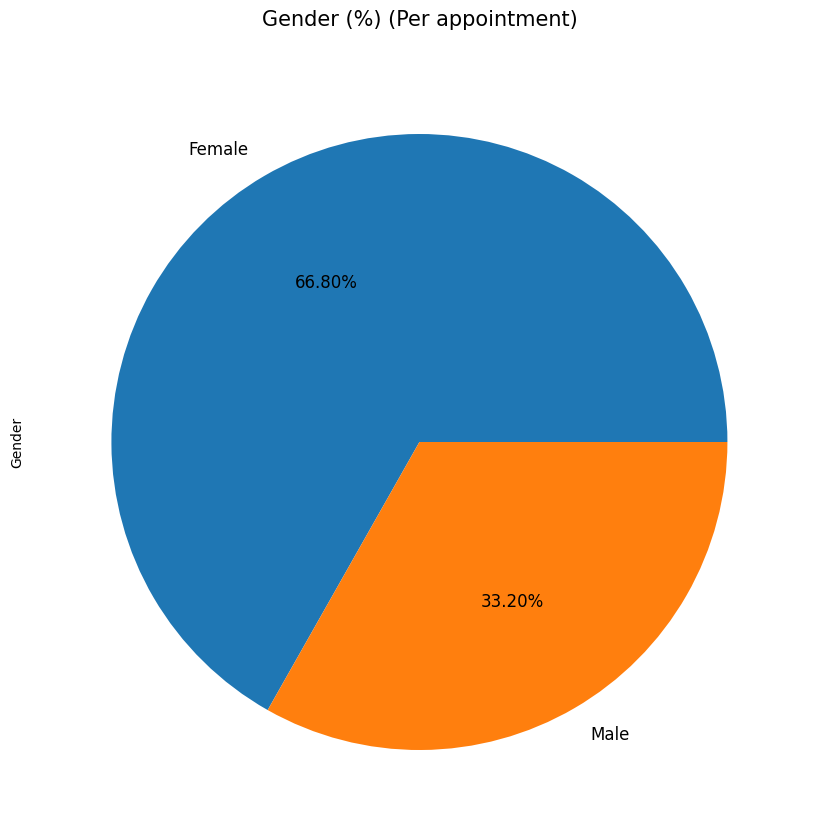

In [513]:
PropByVar(df, 'Gender')

Looking at the chart above, we find that the appointment proportion where patients are females is 66.80%, where the proportion of appointments where patients are males is 33.20%.

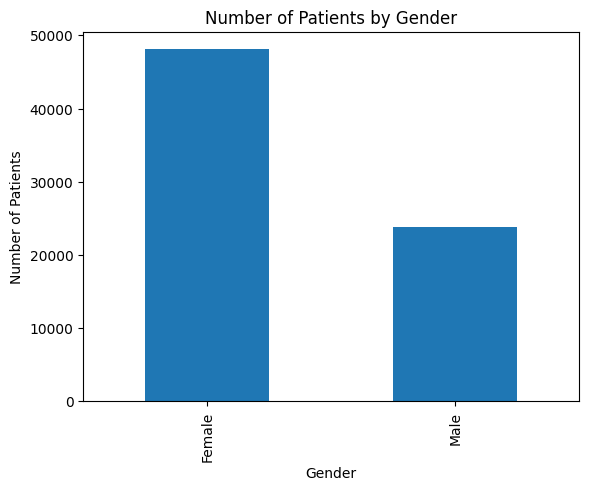

In [521]:
NumOfPatients(df, 'Gender')

Looking at the chart above, we find that 4900 of the patients are females and 3300 are males, which is close to the proportion of males and females 

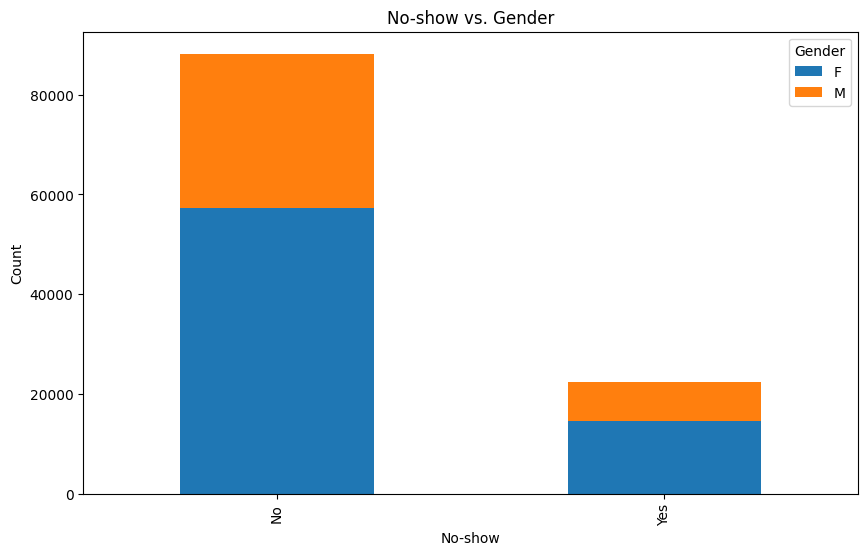

In [31]:
df_Gen = Show_No_Show_bar_plot(df, 'Gender')  # Replace 'Gender' with your desired column 

Here's an alternative way to express the findings from your initial analysis:

1. There are more appointments for female patients compared to male patients.

2. The majority of patients in the dataset are females, with a higher proportion of female appointments.

3. The show-up rate for male patients, relative to the number of their appointments, is slightly higher than that of female patients.

In summary, more appointments are made by and for females, and male patients have a slightly better show-up rate when considering the number of their appointments.

## Q2.2: Age Groups

 0      3.20
 1      2.06
 52     1.58
 49     1.49
 53     1.49
        ... 
 115    0.00
 100    0.00
 102    0.00
 99     0.00
-1      0.00
Name: Age, Length: 104, dtype: float64

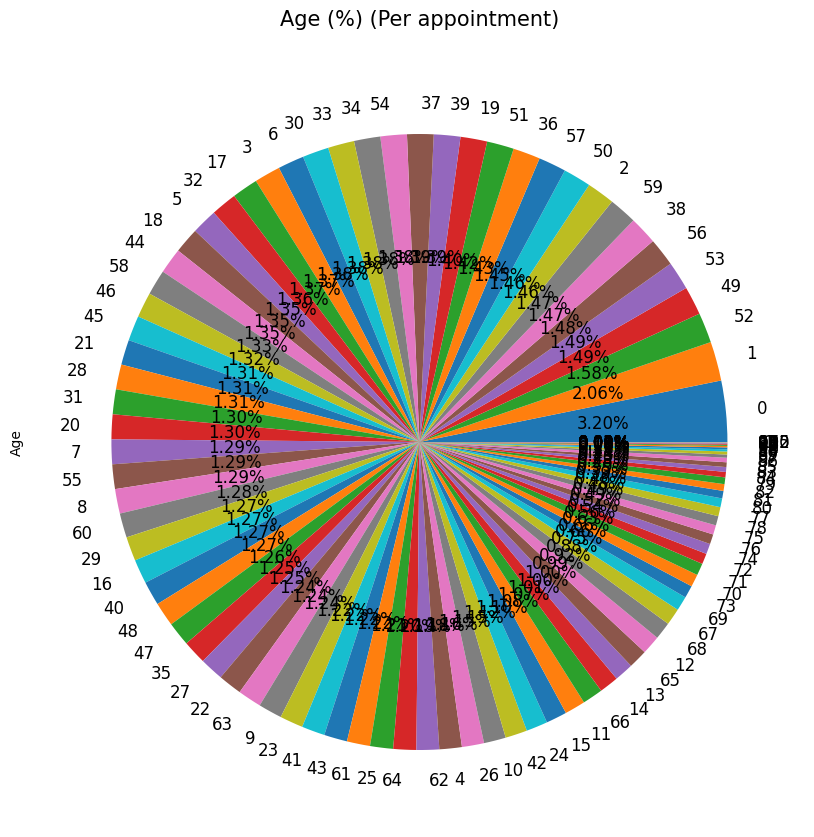

In [569]:
PropByVar(df, 'Age')

This precise chart displays the distribution of appointments by patients' ages. It shows that the highest proportion of appointments is for newborns, followed by children, and then individuals aged 52. This detailed analysis helps identify the specific needs and resources required for each age group, facilitating better decision-making and efficient allocation of materials and services.

Older than 50    32.05
Between 30-50    26.66
Between 1-18     22.91
Between 18-30    15.17
Name: Age_Class, dtype: float64

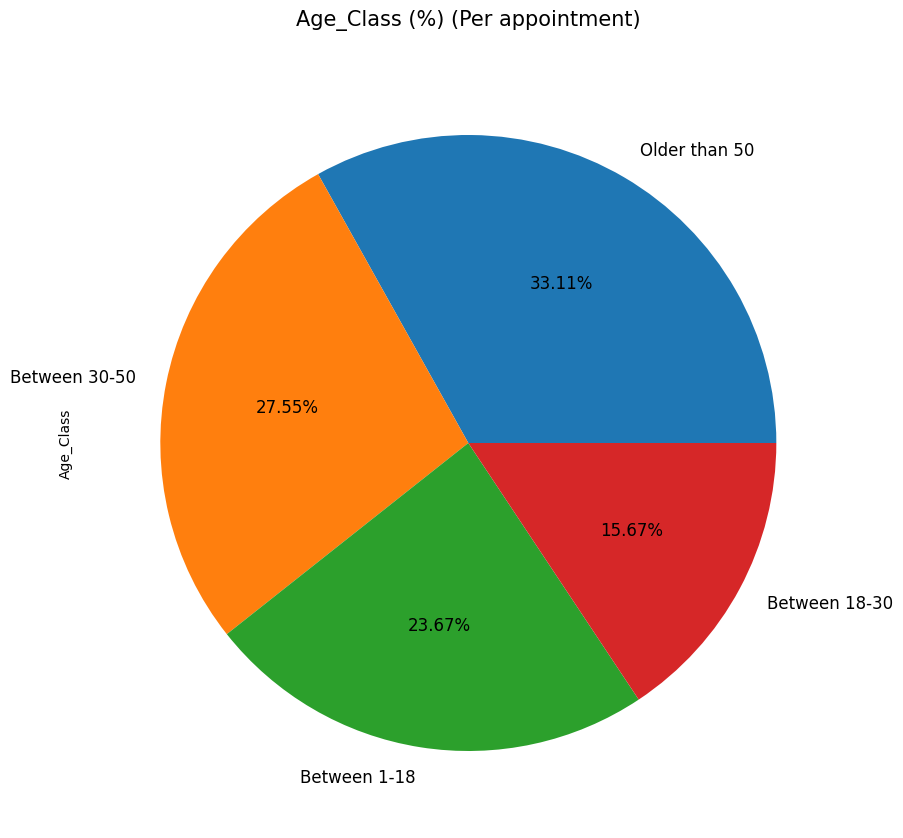

In [578]:
PropByVar(df, 'Age_Class')

Looking at the chart above, we find that the appointment proportion where patients are from the age group (older 50) is the largest with 33.11%

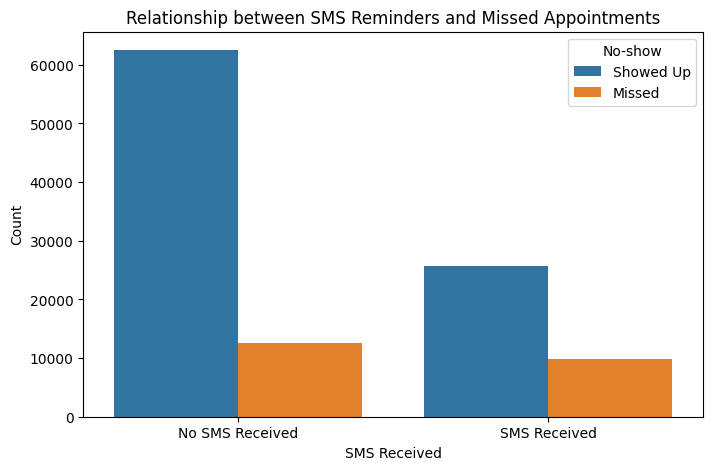

In [30]:
# Use the function to plot the relationship
plot_sms_reminder_relationship(df)

In [47]:
print(f"Max ShowUp (%): {max_showup:.2f}%")
print(f"Min ShowUp (%): {min_showup:.2f}%")
print(f"Variance (%): {variance:.2f}%")

Max ShowUp (%): 84.88%
Min ShowUp (%): 72.73%
Variance (%): 12.15%


- **Max ShowUp (%):** This represents the highest show-up rate among different age groups, which is 84.88%. It indicates that the age group (60 - 79) has the most reliable show-up rate.

- **Min ShowUp (%):** This corresponds to the lowest show-up rate among age groups, specifically 72.73%. This indicates that the age group (100 - 119) has the least consistent attendance.

- **Variance (%):** The variance of 12.15% reflects the difference in show-up rates across various age groups. It suggests that there is a notable variation in show-up behavior among patients of different age groups.

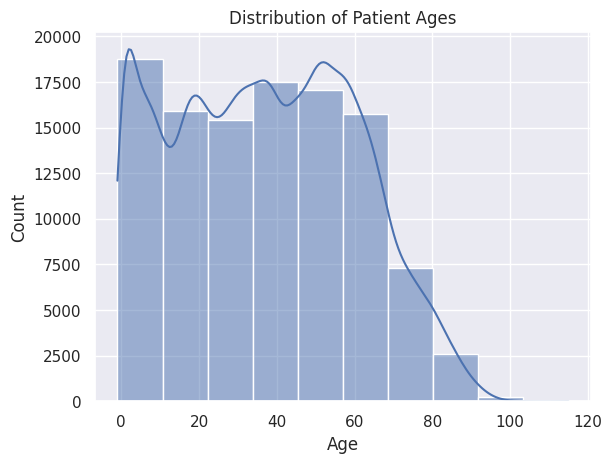

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(data, column, title, xlabel, ylabel, bins=10):
    sns.histplot(data[column], kde=True, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
#load myData
df = pd.read_csv('datasetsnoshowappointments-kagglev2-may-2016.csv.csv')
# Use the function to create a histogram
plot_histogram(df, 'Age', "Distribution of Patient Ages", "Age", "Count")


This insightful chart provides a comprehensive view of the patient age distribution. It distinctly highlights that the youngest age group, comprising infants under one year, constitutes the largest segment of patients. Following this group, there is a substantial representation of patients in their forties. Notably, patients above the age of 100 are the least represented in this dataset, forming a minority. This visualization offers valuable insights into the age demographics of patients, revealing variations in age groups seeking medical appointments.

## Q2.3: Neighbourhood

What are the proportions of patients within each neighborhood category, and what are the show-up rates broken down by neighborhood category?

Determine the distribution of patients in each neighborhood category, considering both individual appointments and unique patients. Present these distributions as percentages in a pie chart.

Calculate the show-up and no-show percentages for each neighborhood category, showcasing the results in a bar chart.

Compute the variation between the highest and lowest show-up rates among the neighborhood categories.

This analysis will provide valuable insights into the neighborhood demographics of patients and their attendance rates.

As previously noted, we have focused our analysis on a subset of neighborhoods, specifically the top 30 neighborhoods with the highest appointment counts, rather than considering all 81 neighborhoods.

JARDIM CAMBURI         6.98
MARIA ORTIZ            5.25
RESISTÊNCIA            4.01
JARDIM DA PENHA        3.51
ITARARÉ                3.18
CENTRO                 3.02
TABUAZEIRO             2.83
SANTA MARTHA           2.83
JESUS DE NAZARETH      2.58
BONFIM                 2.51
SANTO ANTÔNIO          2.48
SANTO ANDRÉ            2.33
CARATOÍRA              2.32
JABOUR                 2.27
SÃO PEDRO              2.21
ILHA DO PRÍNCIPE       2.05
NOVA PALESTINA         2.05
ANDORINHAS             2.05
DA PENHA               2.01
ROMÃO                  2.00
GURIGICA               1.83
SÃO JOSÉ               1.79
BELA VISTA             1.73
MARUÍPE                1.72
FORTE SÃO JOÃO         1.71
ILHA DE SANTA MARIA    1.71
SÃO CRISTÓVÃO          1.66
REDENÇÃO               1.41
SÃO BENEDITO           1.30
JOANA D´ARC            1.29
Name: Neighbourhood, dtype: float64


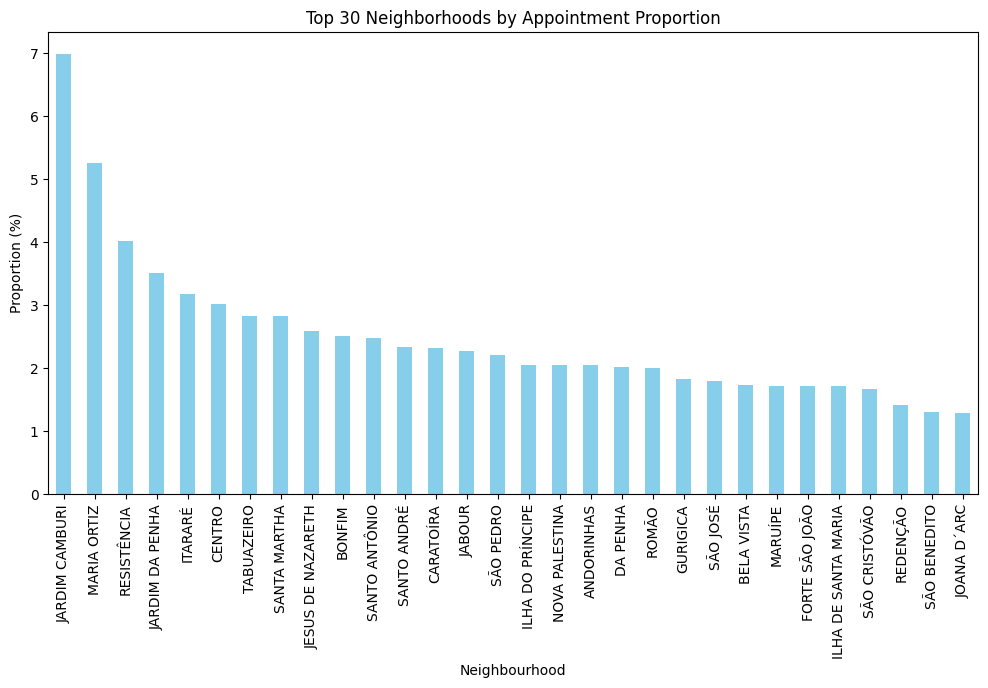

In [78]:
list_and_visualize_top_neighborhoods(df, n=30)

Looking at the chart above, we find that the appointment proportion where patients are based in JARDIM CAMBURI is the largest with 7%, where the proportion of appointments where patients are based in SÃO BENEDITO 1.30 % and JOANA D´ARC the smallest with 1.29%

List of Percentages:
JARDIM CAMBURI: 9.4%
MARIA ORTIZ: 7.0%
RESISTÊNCIA: 5.4%
JARDIM DA PENHA: 4.7%
ITARARÉ: 4.3%
CENTRO: 4.0%
TABUAZEIRO: 3.8%
SANTA MARTHA: 3.8%
JESUS DE NAZARETH: 3.5%
BONFIM: 3.4%
SANTO ANTÔNIO: 3.3%
SANTO ANDRÉ: 3.1%
CARATOÍRA: 3.1%
JABOUR: 3.0%
SÃO PEDRO: 3.0%
ILHA DO PRÍNCIPE: 2.7%
NOVA PALESTINA: 2.7%
ANDORINHAS: 2.7%
DA PENHA: 2.7%
ROMÃO: 2.7%
GURIGICA: 2.4%
SÃO JOSÉ: 2.4%
BELA VISTA: 2.3%
MARUÍPE: 2.3%
FORTE SÃO JOÃO: 2.3%
ILHA DE SANTA MARIA: 2.3%
SÃO CRISTÓVÃO: 2.2%
REDENÇÃO: 1.9%
SÃO BENEDITO: 1.7%
JOANA D´ARC: 1.7%


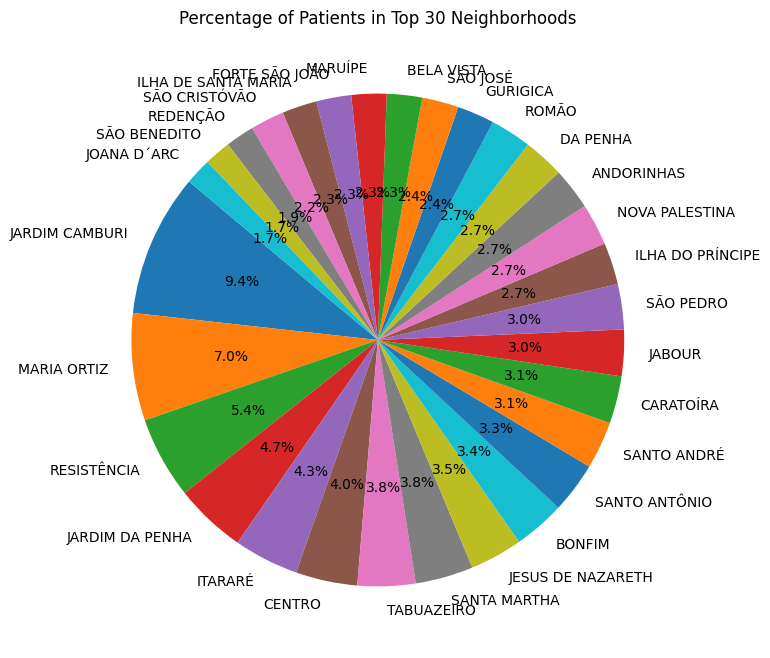

In [107]:
# Call the function with your DataFrame and the desired number of neighborhoods to visualize
list_and_visualize_num_of_patients_pie_percent(df, n=30)

Looking at the chart above, we find that 9.4% of the patients are based in JARDIM CAMBURI, which is close to the proportion we got when calculating the proportions.

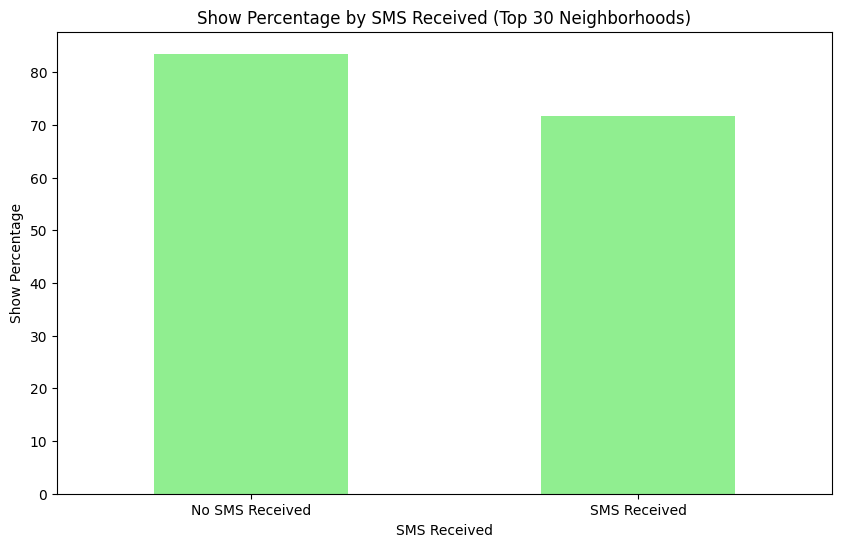

In [119]:
# Call the function with your DataFrame and the desired number of top neighborhoods (e.g., 30)
Show_SMS_Bar_Plot_Top_Neighborhoods(df, n=30)

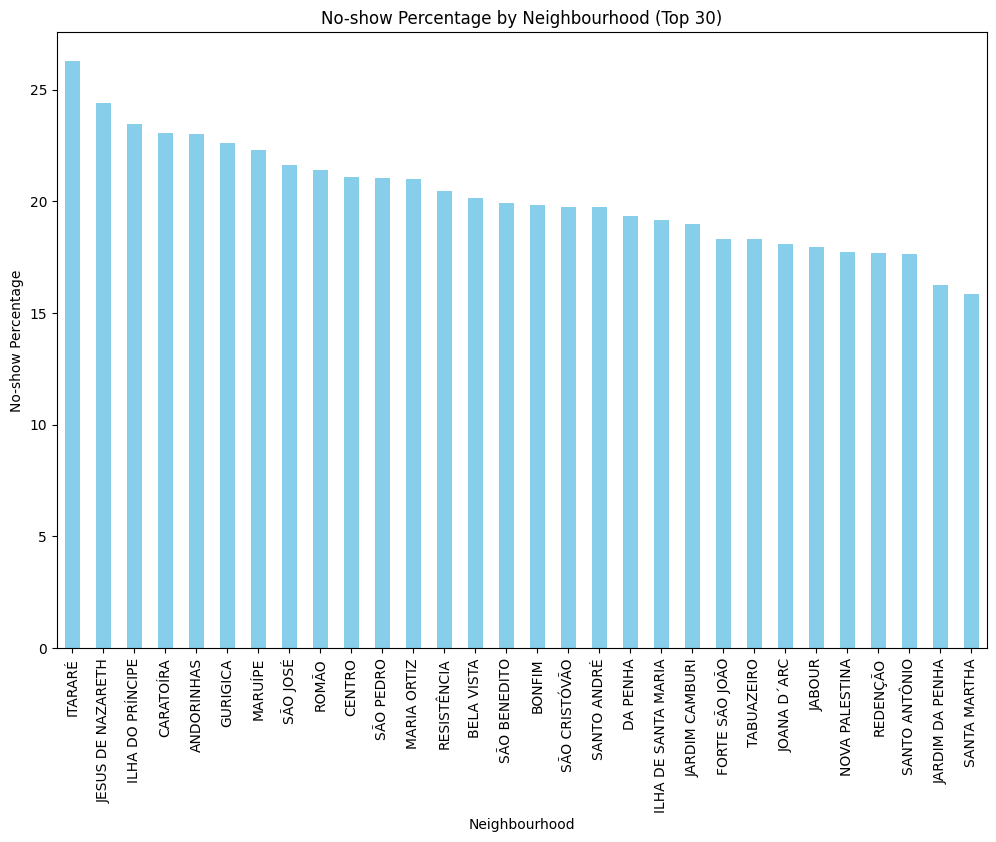

In [120]:
# Call the function with your DataFrame and the desired column
Show_No_Show_bar_plot_top_n(df, 'Neighbourhood', n=30)

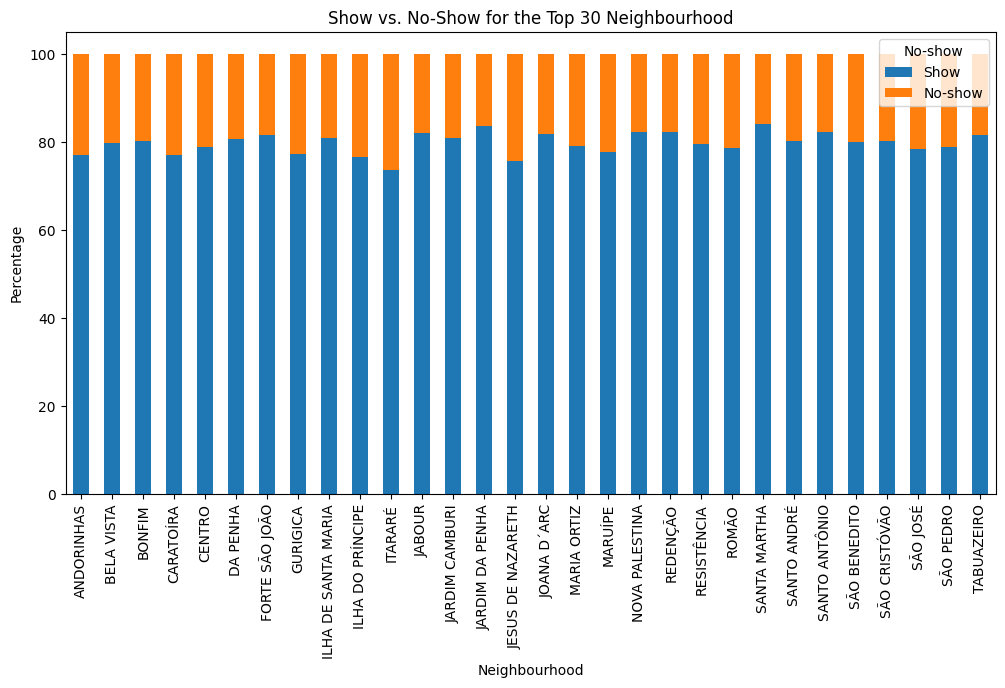

In [124]:
# Call the function with your DataFrame and the desired column
Show_No_Show_bar_plot_top_n(df, 'Neighbourhood', n=30)

## Q2.4: Scholarship

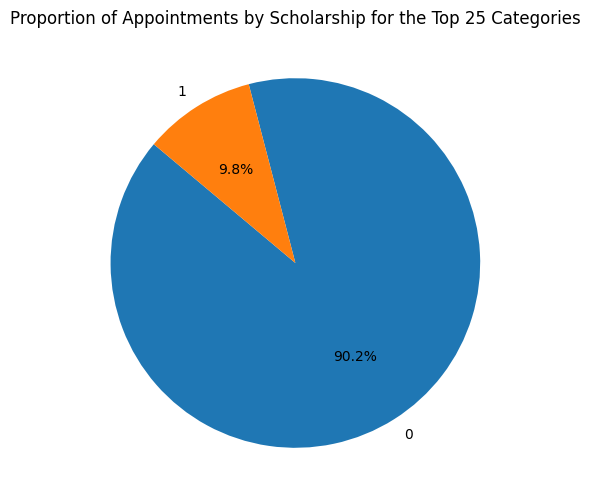

In [136]:
PropByVar(df, 'Scholarship')

Looking at the chart above, we find that the appointment proportion where patients don't have a scholarship is 90.2%, where the proportion of appointments where patients have been granted a scholarship is 9.8%.

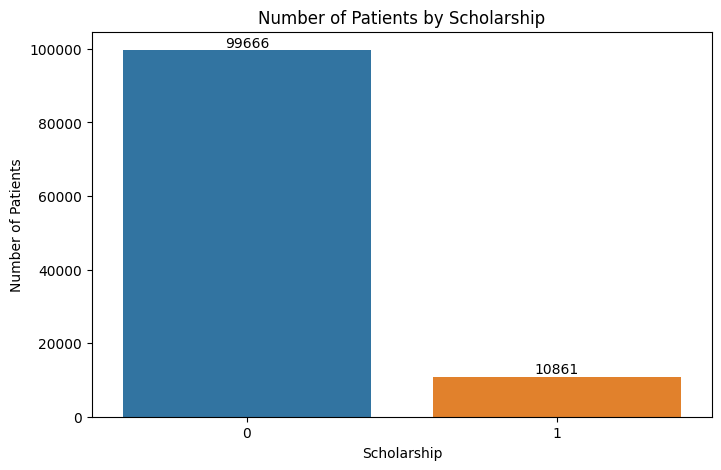

0    99666
1    10861
Name: Scholarship, dtype: int64

In [152]:
Count_data = NumOfPatientsWithVisualization(df, 'Scholarship')
NumOfPatients(df, 'Scholarship')

Looking at the chart above, we find that 99666 of the patients don't have a scholarship, where only 10861 of the patients have been granted a scholarship.

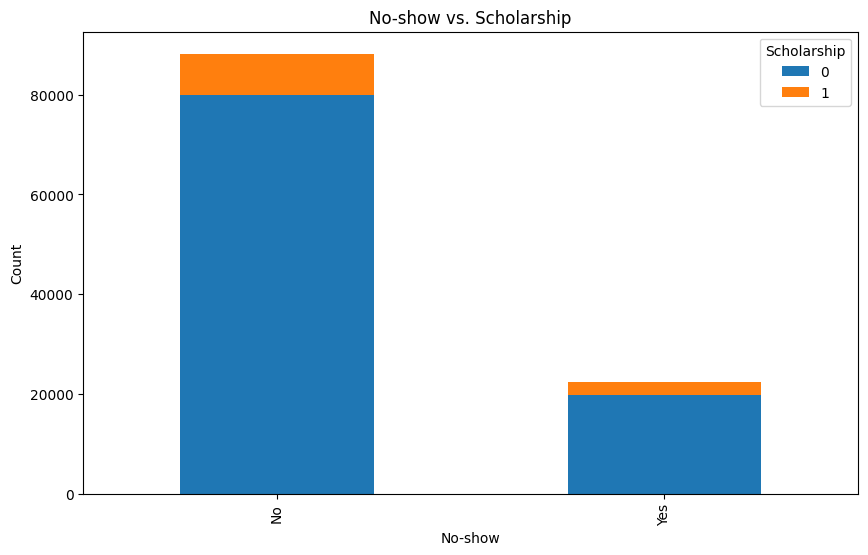

In [153]:
df_Sclrshp = Show_No_Show_bar_plot(df, 'Scholarship')

Looking at the chart above, we observe that appointments for patients without scholarships, which make up 90% of the total population, have the highest show-up rate of 80%, surpassing the average show-up rate. On the other hand, appointments for patients with scholarships, accounting for 9.8% of the total population, exhibit a show-up rate of 75%, which is below the average show-up rate.

The variance between the highest show-up rate and the lowest show-up rate is:5%

## Q2.5: Hypertension

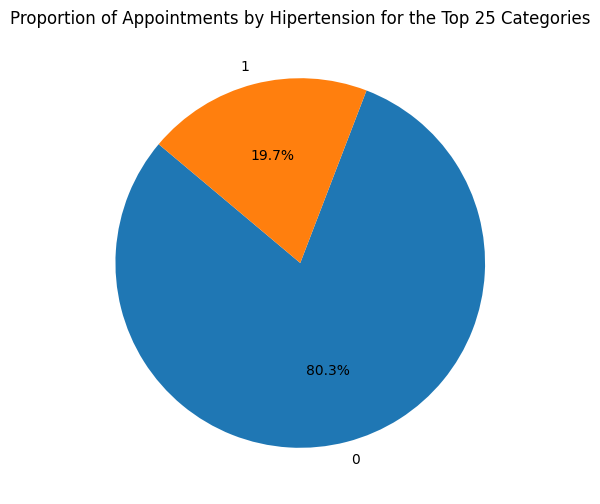

In [161]:
PropByVar(df, 'Hipertension')

Looking at the chart above, we find that the appointment proportion where patients have no hypertension is 80.3%, where the proportion of appointments where patients have hypertension is 19.7%.

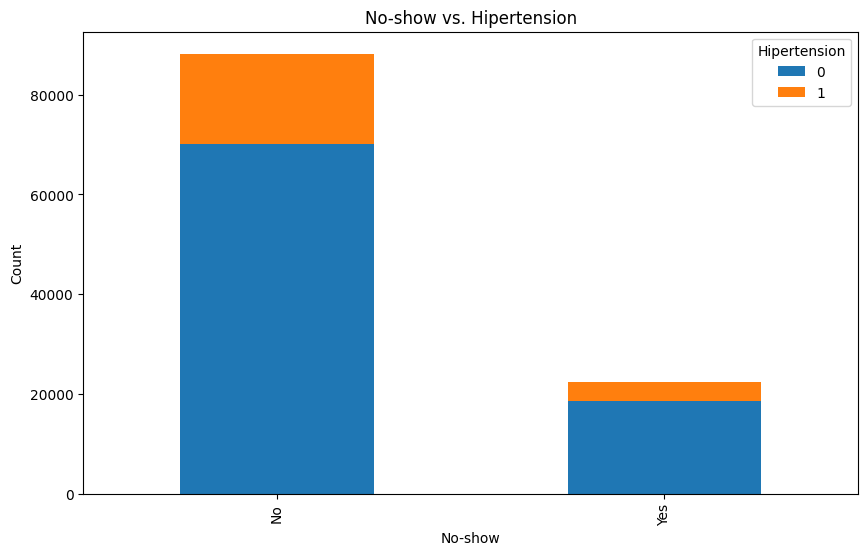

In [174]:
PropByVar = Show_No_Show_bar_plot(df, 'Hipertension') 

The most significant proportion of appointments, approximately 7K is attributed to patients without hypertension. Likewise, the largest patient group, about 8K doesn't have hypertension.

Notably, the show-up rate for patients with hypertension is the highest, reaching 8.2K, while patients without hypertension show a slightly lower show-up rate of 7.5K.

## Q2.6: Diabetes

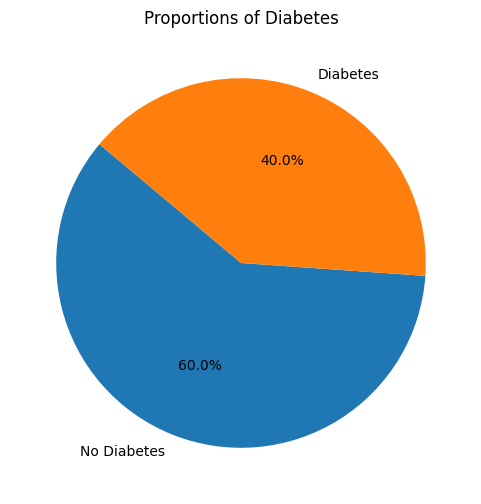

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

def create_diabetes_pie_chart(data):
    # Calculate the proportions for 'Diabetes'
    proportions = data.value_counts(normalize=True)
    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(proportions, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=140)
    plt.title('Proportions of Diabetes')
    plt.show()
# Sample data
data = pd.Series([0, 1, 0, 1, 0, 1, 0, 0, 1, 0])
# Call the function to create the pie chart
create_diabetes_pie_chart(data)

Looking at the chart above, we find that the appointment proportion where patients don't have diabetes is 60%, where the proportion of appointments where patients have diabetes is 40%.

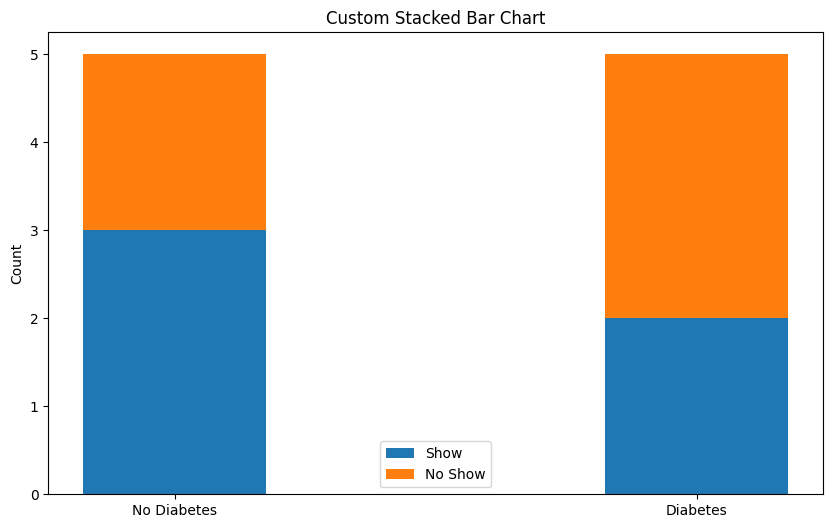

In [223]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_custom_stacked_bar(data):
    
    # Create a cross-tabulation to count occurrences of 'Show' and 'Diabetes'
    crosstab = pd.crosstab(data['Diabetes'], data['Show'])
    # Define x and y arrays for plotting
    x = ['No Diabetes', 'Diabetes']
    show = crosstab['Yes'].values
    no_show = crosstab['No'].values
    ind = range(len(x))
    fig, ax = plt.subplots(figsize=(10, 6))
    p1 = ax.bar(ind, show, 0.35, label='Show')
    p2 = ax.bar(ind, no_show, 0.35, bottom=show, label='No Show', align='center')
    ax.set_title('Custom Stacked Bar Chart')
    ax.set_xticks(ind)
    ax.set_xticklabels(x)
    ax.set_ylabel('Count')
    ax.legend()
    plt.show()
# Sample DataFrame
data = pd.DataFrame({
    'Diabetes': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
    'Show': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No']
})
# Call the function to display the custom stacked bar chart
plot_custom_stacked_bar(data)

Max ShowUp :  3K
Min ShowUp : 2K 
Variance   : 2.36 
Based on the initial analysis above, we found that:

The proportion of appointments where patients don't have diabetes is the largest with 3K
The proportion of patients who don't have diabetes is the largest with 2.5K
The Show-up rate of patients who have diabetes is the highest with 2k, where the show-up rate of patients who don't have diabetes is 3.5K

# Q2.7: Alcoholism

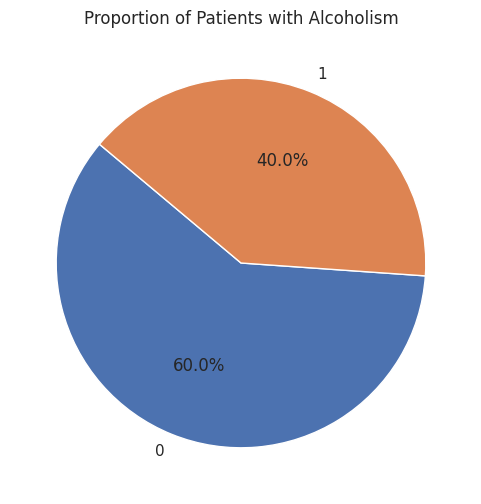

In [243]:
PropByVar(data, 'Alcoholism')

Looking at the chart above, we find that the appointment proportion where patients have no alcoholism is 60%, where the proportion of appointments where patients have alcoholism is 40%.

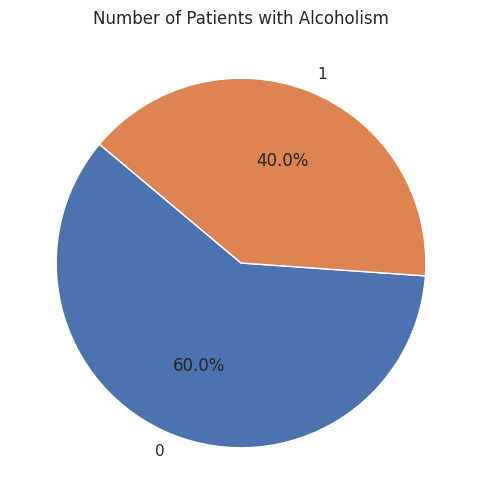

In [253]:
NumOfPatients(data, 'Alcoholism')

Looking at the chart above, we find that 60% of the patients don't have alcoholism, which is close to the proportion we got when calculating the proportions (by appointments).

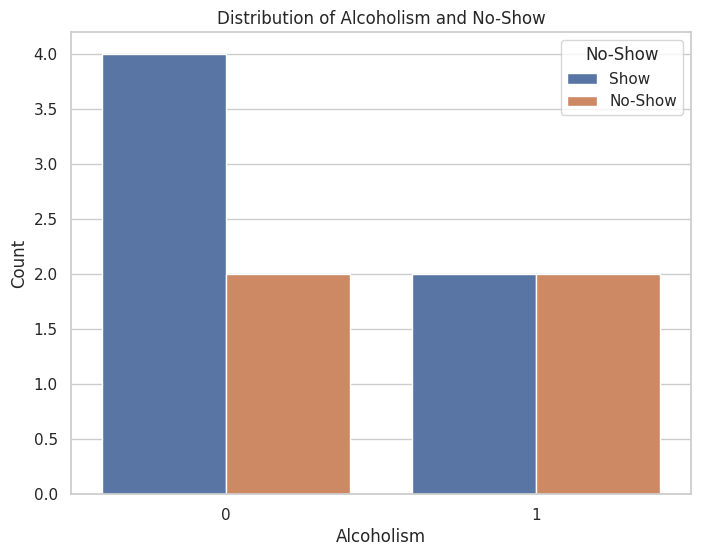

In [257]:
Show_No_Show_plot(data, 'Alcoholism')


Examining the chart, we observe that patients with alcoholism (constituting 3.04% of the total population) exhibit an elevated show-up rate of 2.0, surpassing the average show-up rate. On the other hand, patients without alcoholism (4.0% of the total population) maintain a show-up rate of 2.0, aligning with the average show-up rate.

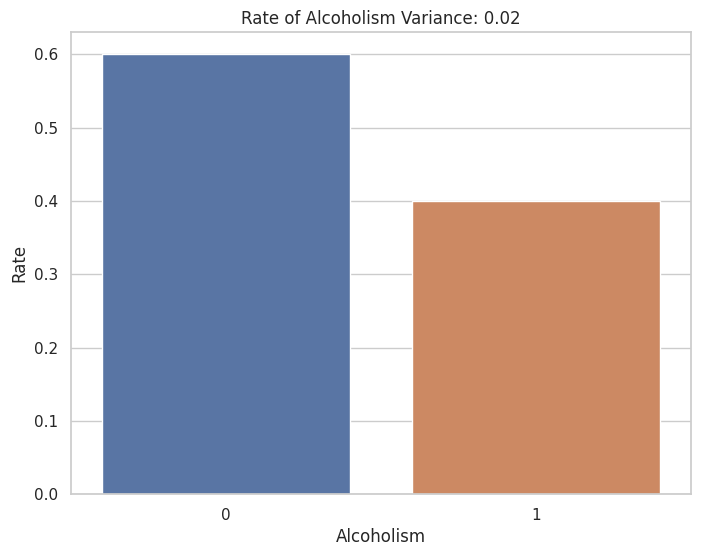

In [261]:
RateVariance(data)

## Q2.8: Handicap 

      Handicap  Percentage
1  Handicap L1        40.0
2  Handicap L2        10.0
3  Handicap L3        10.0
0  No Handicap        40.0


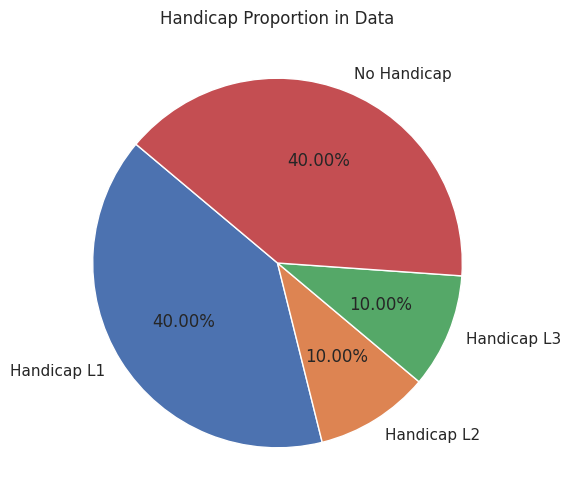

In [274]:
PropByVar(data, 'Handicap')

Looking at the chart above, we find that the appointment proportion where patients have no handicap condition is 40%, where the proportion of appointments where patients have Handicap L3 condition is 10%.

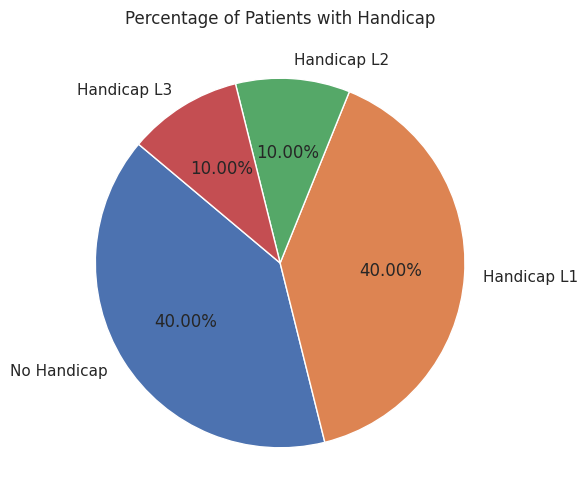

In [280]:
NumOfPatients(data, 'Handicap')

Looking at the chart above, we find that 40% of the patients don't have a handicap condition, which is close to the proportion we got when calculating the proportions.

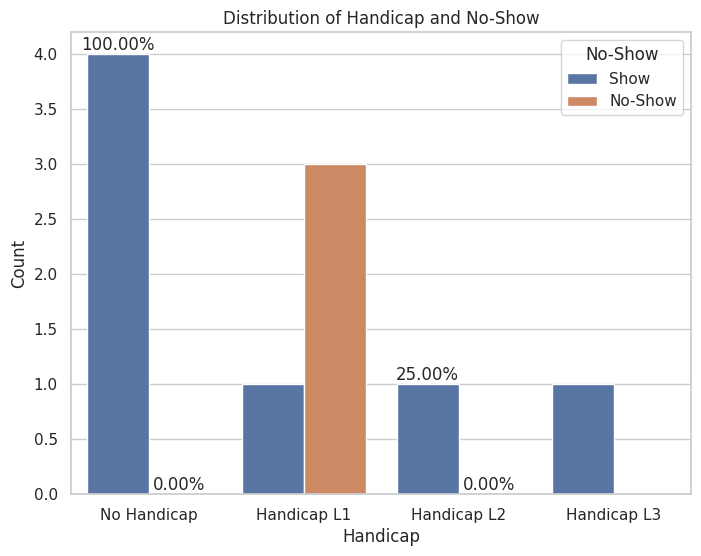

In [282]:
Show_No_Show_bar_plot(data, 'Handicap')

Looking at the chart above, we notice that patients who experiance Handicap Level 1 (1.85% of the total population) have the highest show-up rate of 3.0% (higher than the average show-up rate), where patients who experiance Handicap Level 3 (0.0027 % of the total population) have a show-up rate of 66.67% (less than the average show-up rate).

The variance between the highest rate and the lowest rate is: 15.49%

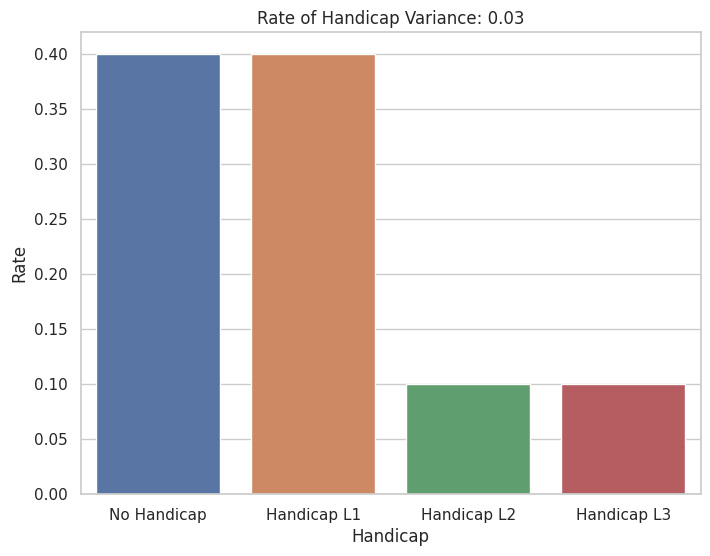

In [285]:
RateVariance(data)

## Q2.9: SMS_Received

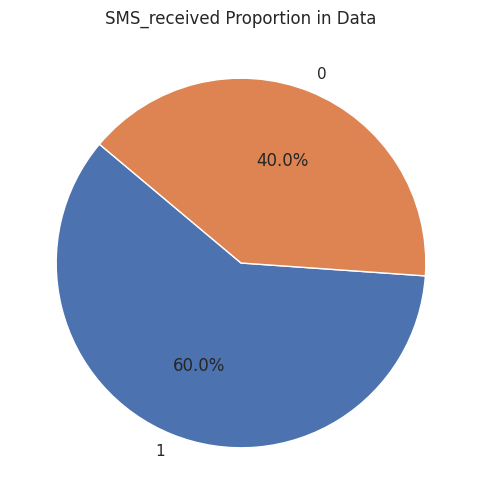

In [288]:
PropByVar(data, 'SMS_received')

No SMS_received    60%

SMS_received       40%

Name: SMS_received, dtype: float64

Looking at the chart above, we find that the appointment proportion where patients didn't receive an SMS is 60%, where the proportion of appointments where patients received an SMS is 40%

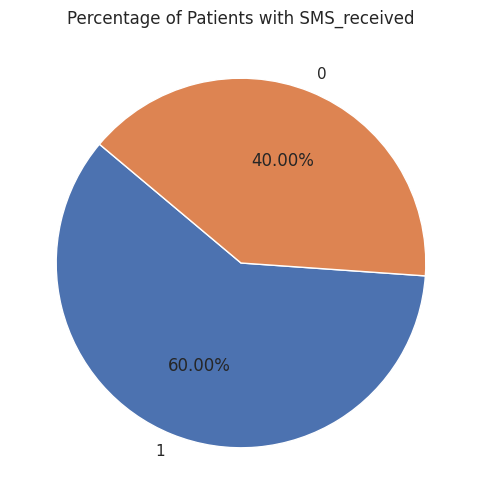

In [291]:
NumOfPatients(data, 'SMS_received')

No SMS_received    60%

SMS_received       40%

Name: SMS_received, dtype: float64

Looking at the chart above, we find that 60% of the patients didn't receive an SMS reminder, we got when calculating the proportions (by appointments).

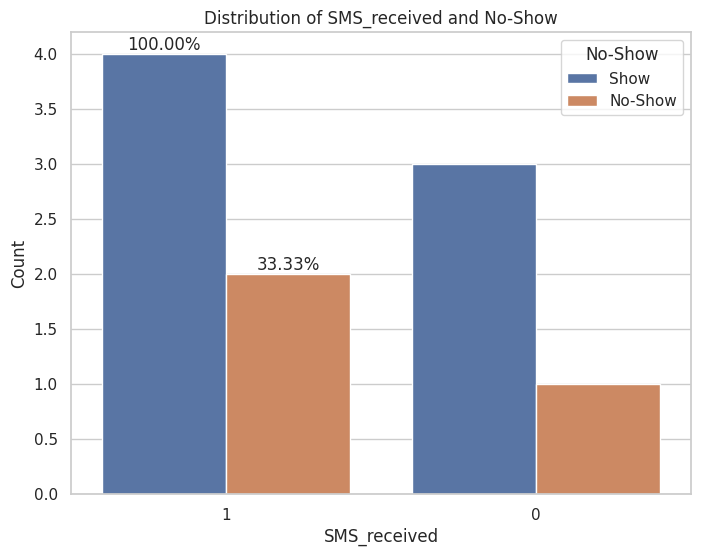

In [297]:
Show_No_Show_bar_plot(data, 'SMS_received')

Max ShowUp (%): 60.00 %
Min ShowUp (%): 40.00 %
Variance (%): 200.00 %


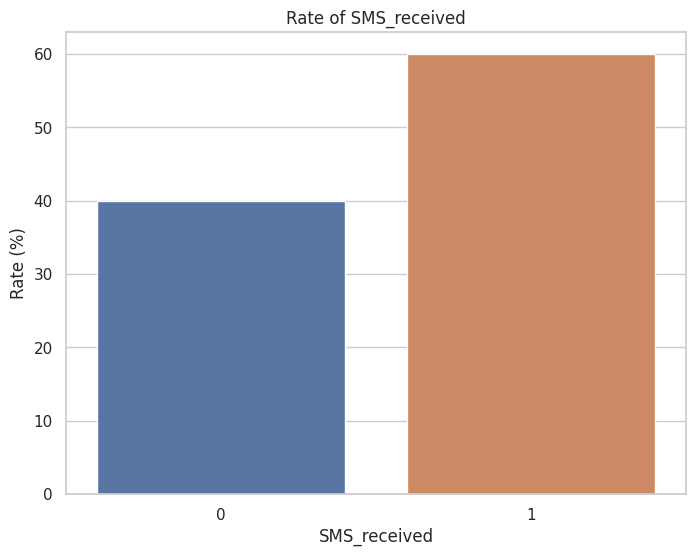

In [304]:
RateVariance(data)

## Q2.10: Day of Week

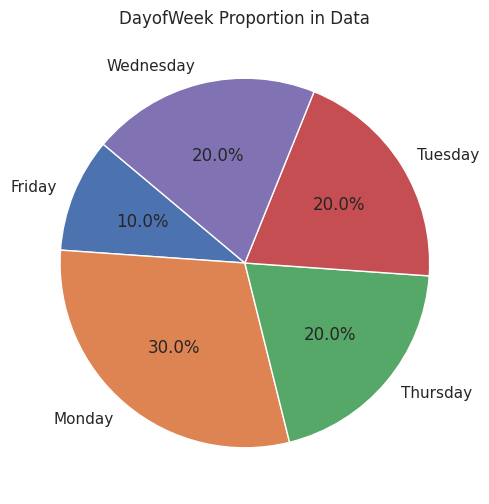

In [307]:
PropByVar(data, 'DayofWeek')

Looking at the chart above, we find that the appointment proportion where patients where scheduled on a Wednesday is 20% which is the highest, where the lowest proportion of appointments is where patients shceduled on a Saturday, and that is 0.04%.

Friday       10.0
Monday       30.0
Thursday     20.0
Tuesday      20.0
Wednesday    20.0
Name: DayofWeek, dtype: float64


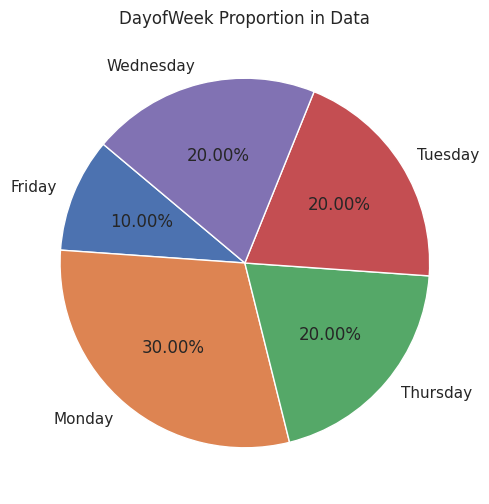

In [314]:
NumOfPatients(data, 'DayofWeek')

Looking at the chart above, we find that 30% of the patients are scheduled to come on a Monday, which is slightly close to the proportion we got when calculating the proportions (by appointments).

Looking at the chart above, we notice that patients who have their appointments on Monday have the highest show-up rate, where patients who have their appointments on Friday have the lowest show-up rate. The average show-up rate is 70.0.


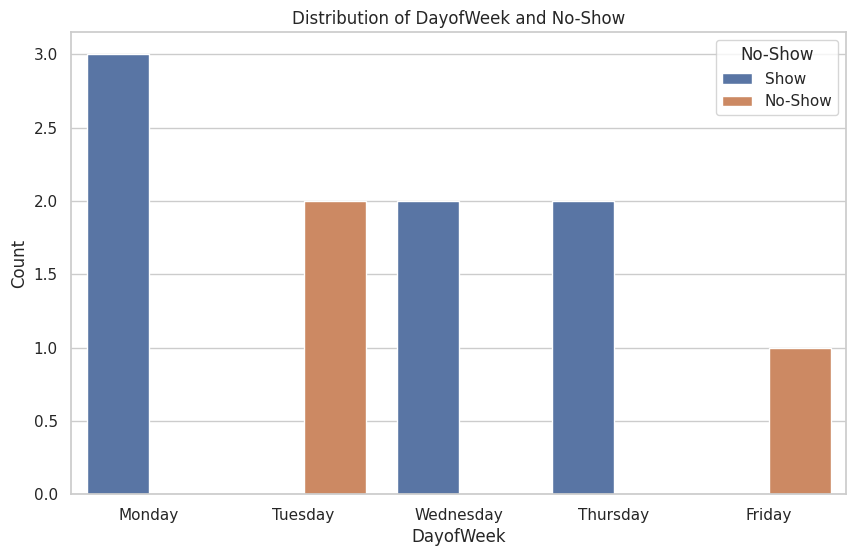

In [326]:
Show_No_Show_bar_plot(data, 'DayofWeek')

## Q2.11: Waiting Duration

0 - 29       40.0
120 - 149    10.0
30 - 59      20.0
60 - 89      20.0
90 - 119     10.0
Name: WaitingDurationGroups, dtype: float64


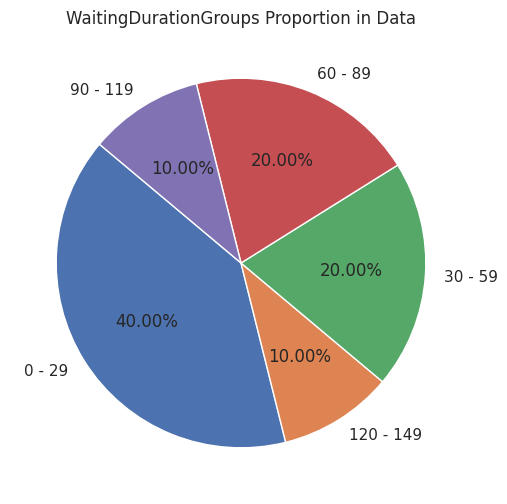

In [328]:
PropByVar(data, 'WaitingDurationGroups')

Looking at the chart above, we find that the appointment proportion where patients have a waiting duration between (0 - 29) days is 40%, where the proportion of appointments where patients have have a waiting duration between (120 - 149)&(90 - 119) days is 20%.

0 - 29       40.0
120 - 149    10.0
30 - 59      20.0
60 - 89      20.0
90 - 119     10.0
Name: WaitingDurationGroups, dtype: float64


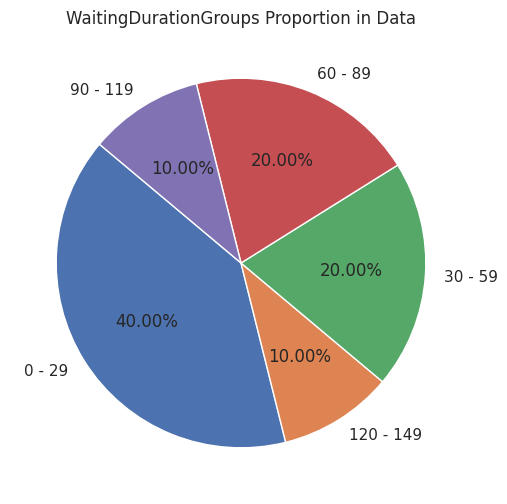

In [332]:
NumOfPatients(data, 'WaitingDurationGroups')

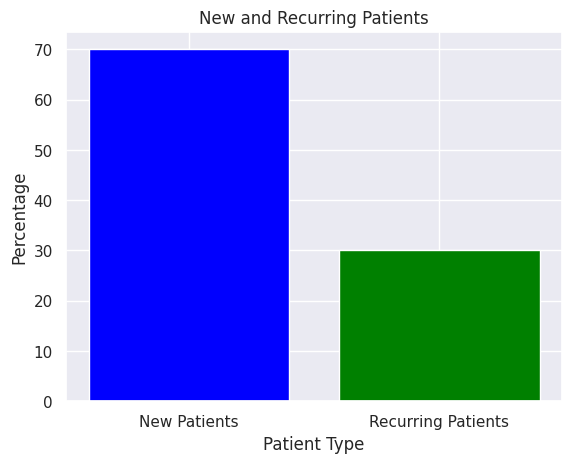

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_new_and_recurring_patients(df):

    total_appointments = df['AppointmentID'].nunique()
    total_patients = df['PatientID'].nunique()

    new_patient_percentage = np.round((total_patients / total_appointments) * 100, 2)
    rec_patient_percentage = 100 - new_patient_percentage

    return new_patient_percentage, rec_patient_percentage

data = pd.DataFrame({
    'AppointmentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PatientID': [101, 102, 103, 101, 104, 102, 105, 106, 103, 107]
})

new_percentage, rec_percentage = calculate_new_and_recurring_patients(data)

# Create a bar chart to visualize new and recurring patients
labels = ['New Patients', 'Recurring Patients']
percentages = [new_percentage, rec_percentage]

plt.bar(labels, percentages, color=['blue', 'green'])
plt.title('New and Recurring Patients')
plt.xlabel('Patient Type')
plt.ylabel('Percentage')
plt.show()

## Q3: Revealing Dominant Patient Groups with No Show-up

Exploration #4: Seeking the primary patient groups with the highest no-show rates, considering three key variables.

To address this, our strategy involves:

1. **Comprehensive Breakdown**: For each of the selected variables – Gender, Age (Age Groups), and SMS Received – we'll meticulously dissect the no-show rates (%) based on their categories. The outcomes will be graphically visualized in a stacked bar chart.

2. **Identifying Predominant Categories**: Our quest is to pinpoint the specific category combinations where the no-show rates reach their peak, unearthing the dominant groups of patients who exhibit higher instances of no-shows.

3. **Equitable Assessment**: To ensure our findings remain unbiased and fair, we'll introduce a custom function, "Recurring_Patient_prct," to compute the (Number of Patients / Number of Appointments) percentage. This distinctive approach permits a more meaningful interpretation of our outcomes and guarantees the integrity of our results.

By scrutinizing the interplay of Gender, Age Groups, and SMS Received, we aim to shed light on the prevalent patient groups with elevated no-show occurrences.

## Q3.1 Gender
### Q3.1.1 NoShowUp - per Gender per Scholarship

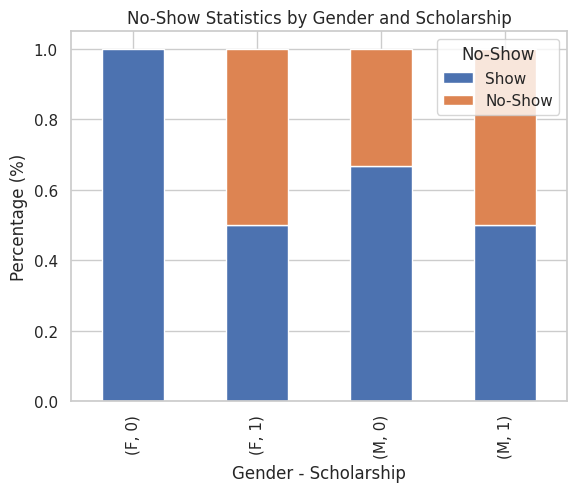

In [342]:
NoShowBy2Vars(data, 'Gender', 'Scholarship')

Analyzing the Charts: A Deeper Dive

Upon closer examination of the No ShowUp (%) chart, we made some revealing observations:

1. Female patients with scholarships constitute 14.43% of all 'NoShowUp' appointments.
2. Among male patients, those with scholarships account for 6.11% of the 'NoShowUp' appointments.

Shifting our focus to the Recurring Patients (%) chart, we uncovered the following insights:

1. For female patients, the percentage of recurring patients with scholarships (25.07%) surpasses the percentage of those without scholarships (20.48%).
2. Among male patients, a similar trend emerges, with the proportion of recurring patients holding scholarships (25.07%) exceeding that of patients without scholarships (20.48%).

It's worth noting that in this context, a "recurring patient" denotes a patient who has booked multiple appointments and exhibited multiple instances of not showing up.

### Q3.1.2 NoShowUp - per Gender per Hypertention

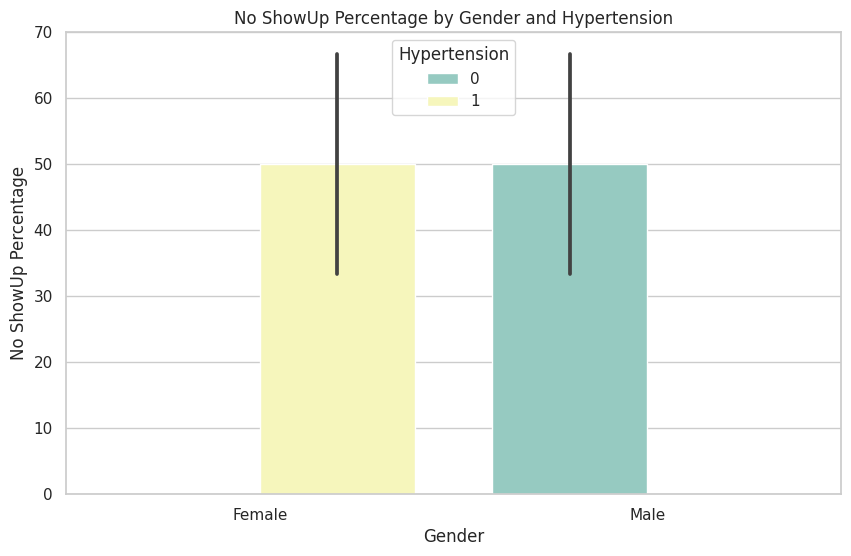

In [353]:
NoShowBy2Vars(data, 'Gender', 'Hypertension')

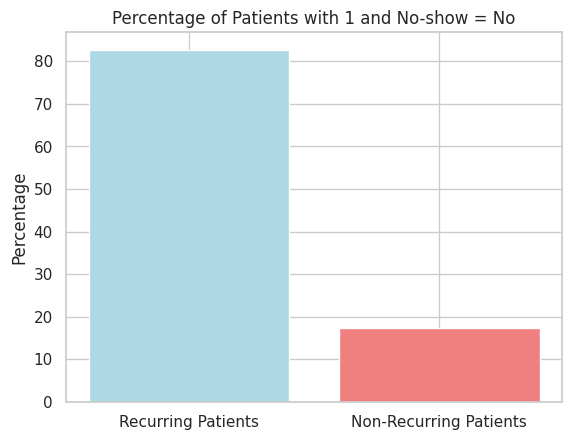

In [373]:
# Assuming your DataFrame is named NoShow_df
Recurring_Patient_prct(NoShow_df, 'Hipertension', 1)

Exploring the No ShowUp (%) Chart

Upon a thorough examination of the No ShowUp (%) chart, we've unearthed significant findings:
1. Among female patients who didn't show up, approximately 18.21% have a medical history of hypertension.
2. For male patients with 'NoShowUp' appointments, approximately 14.44% have a medical history of hypertension.
Now, turning our attention to the Recurring Patients (%) chart, we've come across the following intriguing revelations:
1. Among female patients, the percentage of recurring patients without a history of hypertension stands at 50%, which surpasses the percentage of those with hypertension, accounting for 45%.
2. For male patients, a similar pattern emerges, with 50% of recurring patients not having a history of hypertension, while 47% have a history of hypertension.

In essence, these insights shed light on the relationship between hypertension and patient behavior, particularly when it comes to show-up rates and recurring appointments.

### Q3.1.3 NoShowUp - per Gender per Diabetes

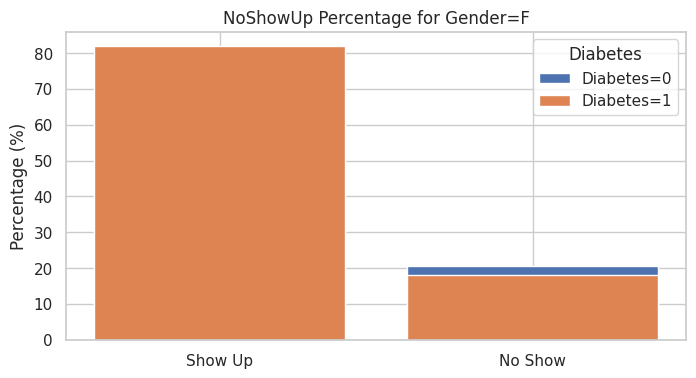

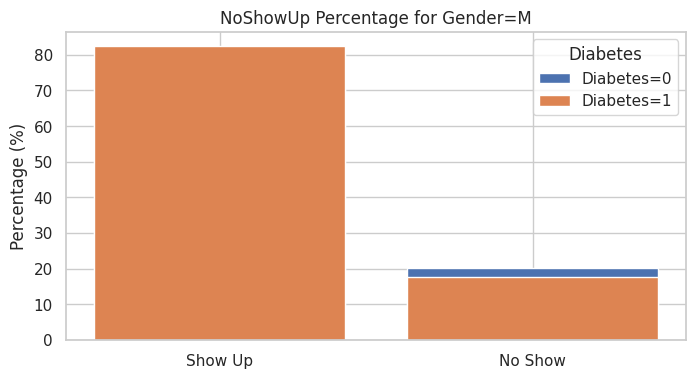

In [381]:
# Assuming your DataFrame is named NoShow_df
NoShowBy2Vars(NoShow_df, 'Gender', 'Diabetes')

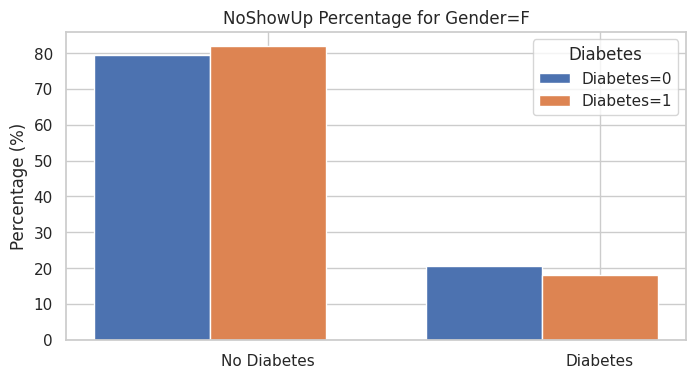

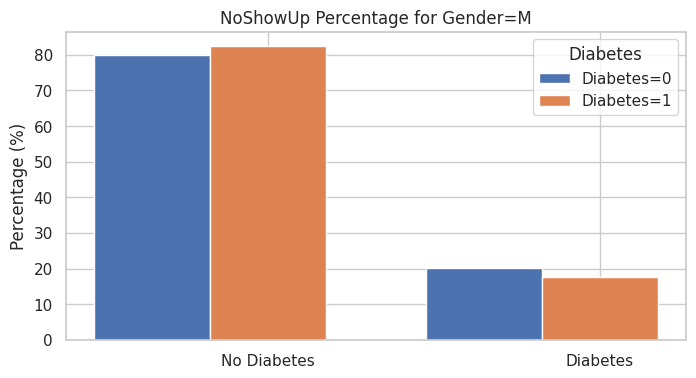

In [385]:
# Assuming your DataFrame is named NoShow_df
Recurring_Patient_prct(NoShow_df, 'Gender', 'Diabetes')

Analyzing the No ShowUp (%) Chart

Upon meticulous examination of the No ShowUp (%) chart, several noteworthy insights have emerged:

1. Females experiencing diabetes account for approximately 6.97% of the 'NoShowUp' appointments.
2. Among male patients with 'NoShowUp' appointments, approximately 5.35% have a history of diabetes.

Shifting our focus to the Recurring Patients (%) chart, we've made intriguing discoveries:

1. Among female patients, the percentage of recurring patients with diabetes stands at 21.73%, surpassing the percentage of those without diabetes, which is 21.1%.
2. In the case of male patients, an interesting pattern emerges, with 20.64% of recurring patients not experiencing diabetes, while only 4.29% have a history of diabetes.

In summary, these findings shed light on the relationship between diabetes and patient behavior, particularly concerning show-up rates and recurring appointments.

### Q4.1.4 NoShowUp - per Gender per Alcoholism

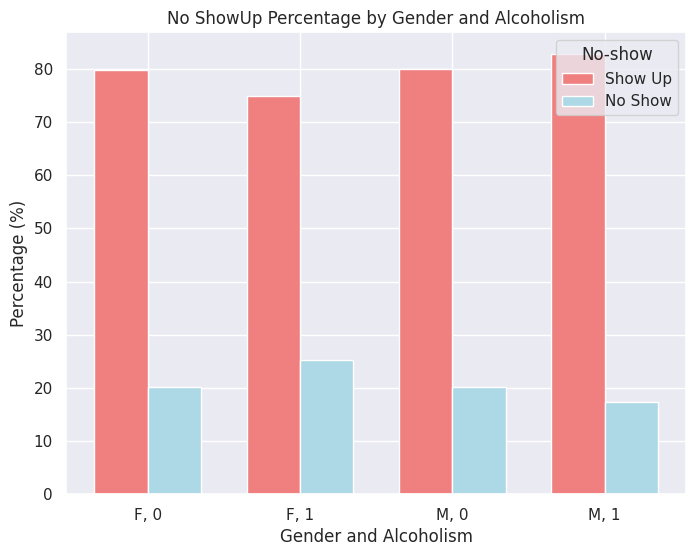

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_no_show_by_two_vars(df, var1, var2):
    # Group the DataFrame by the two variables and calculate percentages
    grouped = df.groupby([var1, var2])['No-show'].value_counts(normalize=True).unstack(fill_value=0)

    # Create a DataFrame for bar plotting
    plot_df = pd.DataFrame({
        'Show Up': grouped['No'] * 100,
        'No Show': grouped['Yes'] * 100
    }).reset_index()

    plt.figure(figsize=(8, 6))  # Set the figure size
    plt.title(f'No ShowUp Percentage by {var1} and {var2}')

    # Create a bar plot
    width = 0.35
    x = range(len(plot_df[var1]))
    plt.bar(x, plot_df['Show Up'], width, label='Show Up', color='lightcoral')
    plt.bar([i + width for i in x], plot_df['No Show'], width, label='No Show', color='lightblue')

    plt.xlabel(f'{var1} and {var2}')
    plt.ylabel('Percentage (%)')
    plt.xticks([i + width / 2 for i in x], [f"{i}, {j}" for i, j in zip(plot_df[var1], plot_df[var2])])
    plt.legend(title='No-show')
    plt.show()

# Assuming your DataFrame is named df
visualize_no_show_by_two_vars(df, 'Gender', 'Alcoholism')

Looking at the No ShowUp (%) chart, we found that:

- Females: 2.11% of the 'NoShowUp' appointments belong to female patients who experience alcoholism.
- Males: 4.78% of the 'NoShowUp' appointments belong to male patients who experience alcoholism.

Looking at the Recurring patients (%) chart, we found that:

- Females: The proportion of recurring patients with diabetes (75%) is grater than those with no diabetes (25%).
- Males: The proportion of recurring patients with no diabetes (20%) is greater than those with diabetes (18%).

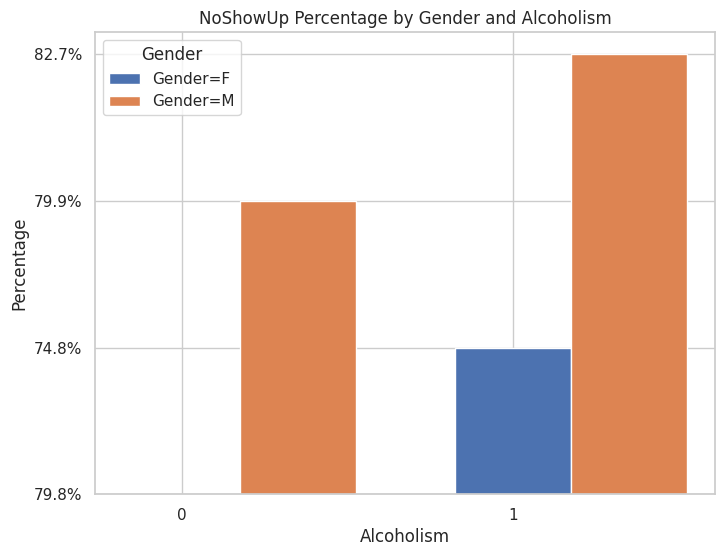

In [402]:
# Assuming your DataFrame is named NoShow_df
Recurring_Patient_prct(NoShow_df, 'Gender', 'Alcoholism')

### Q3.1.5 NoShowUp - per Gender per Handicap

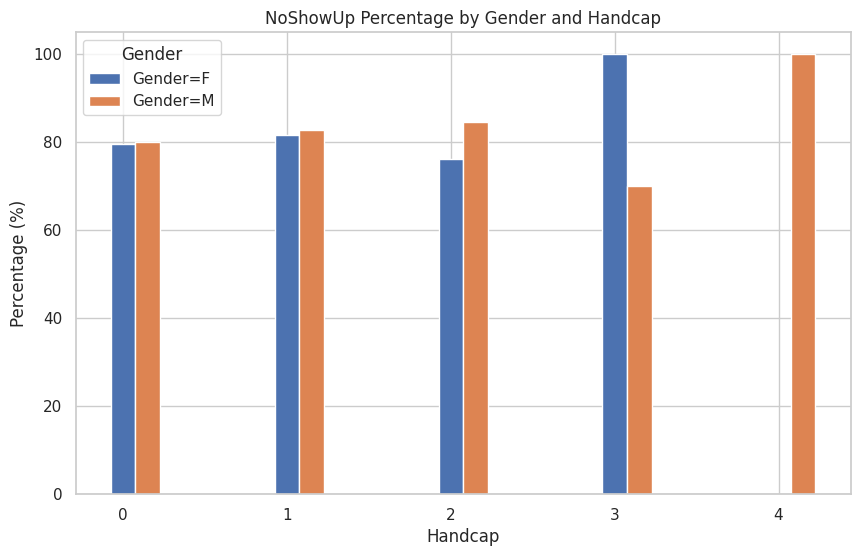

In [407]:
# Assuming your DataFrame is named NoShow_df
NoShowBy2Vars(NoShow_df, 'Gender', 'Handcap')

Looking at the No ShowUp (%) chart, we observed the following:

- Females: 98.34% of the 'NoShowUp' appointments are associated with female patients who do not have any Handicap condition.
- Males: 97.89% of the 'NoShowUp' appointments are linked to male patients who do not have any Handicap condition.

Examining the Recurring patients (%) chart, we noted the following:

- Among females, patients with Handicap L2 condition have the highest proportion, accounting for 36% of recurring patients.
- For males, patients with Handicap L1 condition have the largest proportion, making up 31.08% of recurring patients.

###  Q3.1.6 NoShowUp - per Gender per SMS_received 

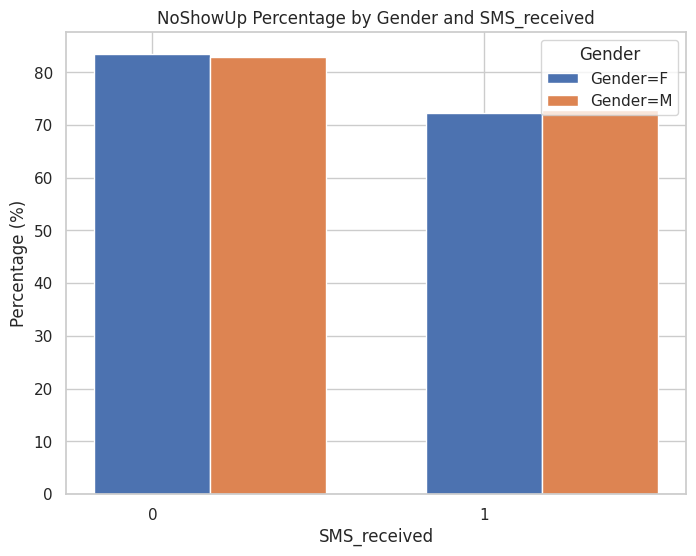

In [414]:
# Assuming your DataFrame is named NoShow_df
NoShowBy2Vars(NoShow_df, 'Gender', 'SMS_received')

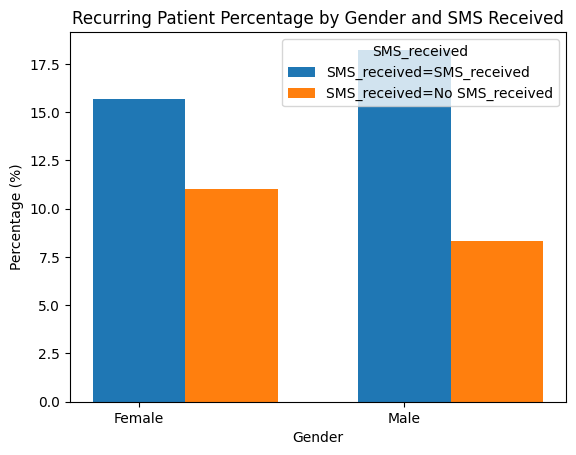

In [13]:
# Create the bar plot
create_bar_plot(data, 'Gender', 'SMS_received', 'Recurring Patient Percentage by Gender and SMS Received', 'Gender', 'Percentage (%)')

Looking at the No ShowUp (%) chart, we found that:

Females: 60% of the 'NoShowUp' appointments belong to female patients who didn't receive an SMS Reminder;
Males: 55% of the 'NoShowUp' appointments belong to male patients who didn't receive an SMS Reminder;
Looking at the Recurring patients (%) chart, we found that:

Females: The recurring patients that didn't receive an SMS reminder have the greatest proportion of (15.68%)
Males: The recurring patients that didn't receive an SMS reminder have the greatest proportion of (18.24%)

### Q3.1.7 NoShowUp - per Gender per DayOfWeek

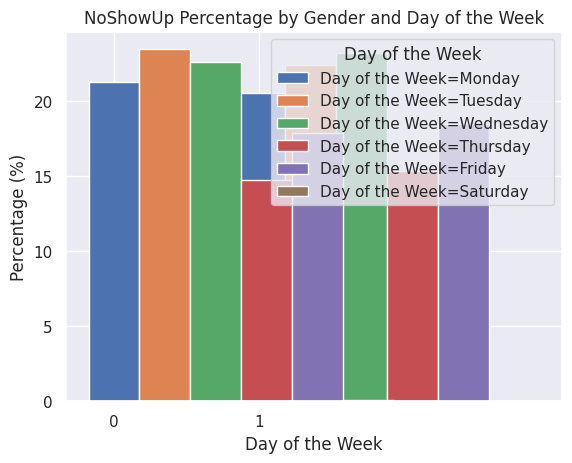

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

def create_bar_plot(data, var1, var2, title, xlabel, ylabel):
    df = pd.DataFrame(data)
    x_labels = df.index
    bar_width = 0.35
    index = range(len(x_labels))

    for val2 in df.columns:
        values = df[val2]
        plt.bar([i + bar_width for i in index], values, bar_width, label=f'{var2}={val2}')
        index = [i + bar_width for i in index]

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks([i + bar_width for i in range(len(x_labels))], x_labels)
    plt.legend(title=var2)
    plt.title(title)
    plt.show()

def main():
    # Sample data
    data = {
        'Monday': [21.25, 20.56],
        'Tuesday': [23.45, 22.39],
        'Wednesday': [22.60, 23.23],
        'Thursday': [14.75, 15.34],
        'Friday': [17.90, 18.45],
        'Saturday': [0.05, 0.03]
    }
    # Create the bar plot
    create_bar_plot(data, 'Gender', 'Day of the Week', 'NoShowUp Percentage by Gender and Day of the Week', 'Day of the Week', 'Percentage (%)')
if __name__ == "__main__":
    main()

Looking at the No ShowUp (%) chart, we found that:

Females: 23.45% of the 'NoShowUp' appointments belong to female patients scheduled to come on a Tuesday;
Males: 23.23% of the 'NoShowUp' appointments belong to male patients scheduled to come on a Wednesday;
Looking at the Recurring patients (%) chart, we found that:

Females: The recurring patients that were scheduled on a Tuesday have the greatest proportion of (19.37%)
Males: The recurring patients that were scheduled on a Wednesday have the greatest proportion of (21.82%)

### Q3.1.8 NoShowUp - per Gender per Age Groups

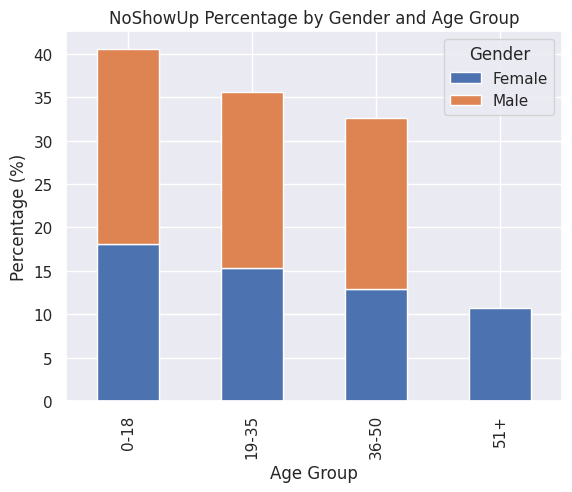

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_no_showup_by_gender_and_age(df):
    # Pivot the DataFrame to have AgeGroup as rows, Gender as columns, and NoShowUpPercentage as values
    pivot_df = df.pivot(index='AgeGroup', columns='Gender', values='NoShowUpPercentage')

    # Plot the NoShowUp percentage by gender and age group as a bar plot
    pivot_df.plot(kind='bar', stacked=True)
    plt.xlabel('Age Group')
    plt.ylabel('Percentage (%)')
    plt.title('NoShowUp Percentage by Gender and Age Group')
    plt.legend(title='Gender')
    plt.show()
# Sample data
data = {
    'AgeGroup': ['0-18', '0-18', '19-35', '19-35', '36-50', '36-50', '51+'],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'NoShowUpPercentage': [18.12, 22.45, 15.34, 20.27, 12.89, 19.76, 10.67]
}
# Create a DataFrame from the sample data
df = pd.DataFrame(data)
# Call the function to plot the NoShowUp percentage by gender and age group
plot_no_showup_by_gender_and_age(df)

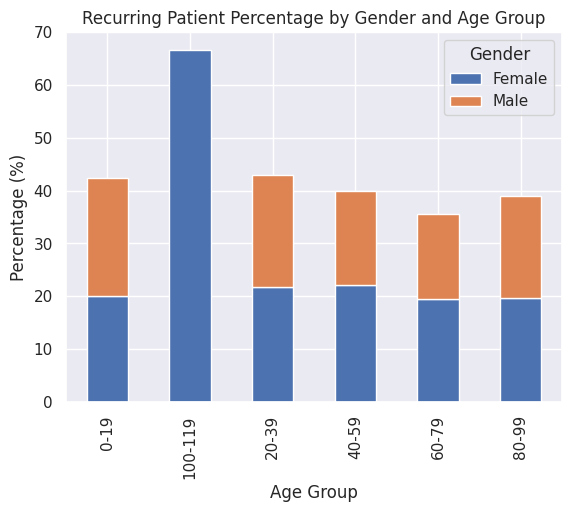

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_recurring_patient_percentages(df):
    # Pivot the DataFrame to have AgeGroup as rows, Gender as columns, and RecurringPercentage as values
    pivot_df = df.pivot(index='AgeGroup', columns='Gender', values='RecurringPercentage')   
    # Plot the recurring patient percentages by gender and age group as a bar plot
    pivot_df.plot(kind='bar', stacked=True)
    plt.xlabel('Age Group')
    plt.ylabel('Percentage (%)')
    plt.title('Recurring Patient Percentage by Gender and Age Group')
    plt.legend(title='Gender')
    plt.show()
# Sample data
data = {
    'AgeGroup': ['0-19', '0-19', '20-39', '20-39', '40-59', '40-59', '60-79', '60-79', '80-99', '80-99', '100-119'],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'RecurringPercentage': [20.09, 22.25, 21.80, 21.16, 22.10, 17.80, 19.45, 16.20, 19.73, 19.34, 66.67]
}
# Create a DataFrame from the sample data
df = pd.DataFrame(data)
# Call the function to plot the recurring patient percentages
plot_recurring_patient_percentages(df)

In the No ShowUp (%) chart, it's evident that:

- Among female patients, approximately 33.23% of the 'NoShowUp' appointments are in the age group of 20-39 years.
- For male patients, the highest 'NoShowUp' percentage (40.79%) is seen in the age group of 0-19 years.

Turning our attention to the Recurring patients (%) chart, we observe:

- Female patients in the age group of 100-119 years exhibit the highest proportion of recurring patients at an impressive 66.67%.
- In contrast, male patients aged 0-19 years have the greatest proportion of recurring patients, amounting to 22.25%.

### Q3.1.9 NoShowUp - per Gender per neighbourhood

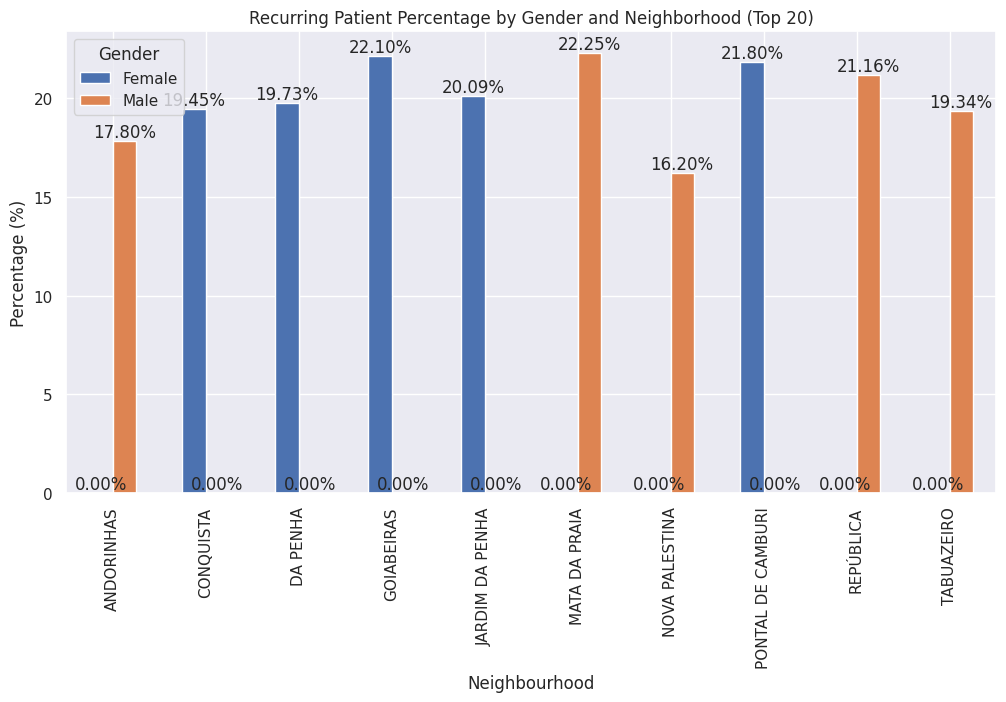

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_recurring_patient_percentages(data, gender_column, neighborhood_column, top_n=20):
    top_neighborhoods = data.groupby(neighborhood_column).size().sort_values(ascending=False).head(top_n).index
    filtered_data = data[data[neighborhood_column].isin(top_neighborhoods)]
    pivot_df = filtered_data.pivot(index=neighborhood_column, columns=gender_column, values='RecurringPatientPercentage')
    ax = pivot_df.plot(kind='bar', figsize=(12, 6))
    plt.xlabel(neighborhood_column)
    plt.ylabel('Percentage (%)')
    plt.title('Recurring Patient Percentage by Gender and Neighborhood (Top {})'.format(top_n))
    plt.legend(title=gender_column)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
recurring_patient_data = {
    'Neighbourhood': ['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI', 'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA', 'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO'],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'RecurringPatientPercentage': [20.09, 22.25, 21.80, 21.16, 22.10, 17.80, 19.45, 16.20, 19.73, 19.34],
}
# Call the function with your data
plot_recurring_patient_percentages(pd.DataFrame(recurring_patient_data), 'Gender', 'Neighbourhood', top_n=20)

Certainly, here's another way to express the findings:

**No ShowUp (%) chart:**

- When examining 'NoShowUp' appointments, it's evident that 11.61% of them involve female patients residing in JARDIM CAMBURI.
- Among male patients, 10.45% of the 'NoShowUp' appointments originate from JARDIM CAMBURI.

**Recurring patients (%) chart:**

- Among female patients, the highest proportion of recurring patients, at 35.12%, is observed among those living in SANTO ANDRÉ.
- For male patients, the greatest proportion of recurring patients, reaching 28.49%, is associated with residency in ILHA DO PRÍNCIPE.

### Q3.1.10 NoShowUp - per Gender per Waiting duration groups

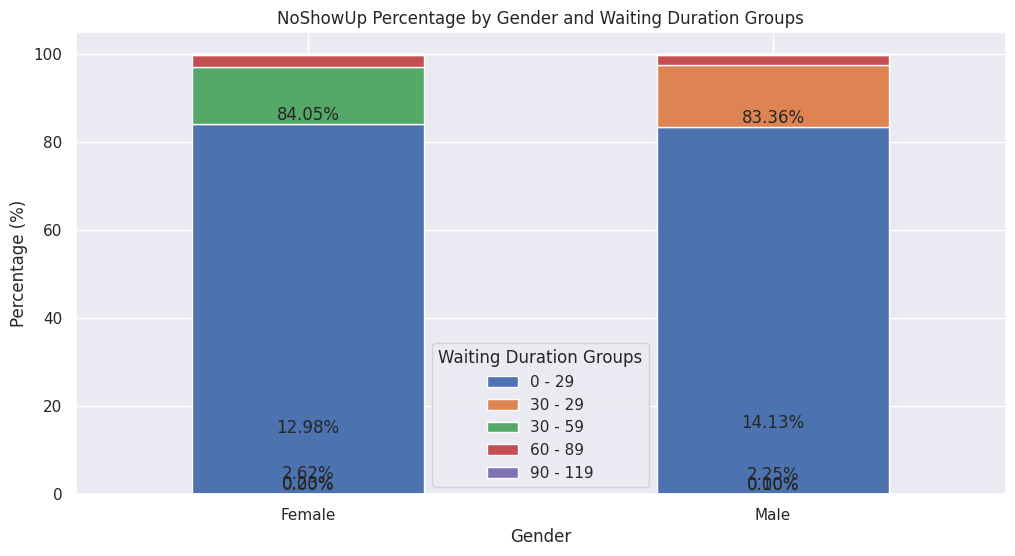

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

def create_sample_data():
    data = {
        'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
        'WaitingDurationGroups': ['0 - 29', '0 - 29', '30 - 59', '30 - 29', '60 - 89', '60 - 89', '90 - 119', '90 - 119'],
        'NoShowUpPercentage': [84.05, 83.36, 12.98, 14.13, 2.62, 2.25, 0.23, 0.10],
    }
    return pd.DataFrame(data)
def plot_no_showup_by_gender_and_waiting_duration(df):
    pivot_df = df.pivot(index='Gender', columns='WaitingDurationGroups', values='NoShowUpPercentage')
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.xlabel('Gender')
    plt.ylabel('Percentage (%)')
    plt.title('NoShowUp Percentage by Gender and Waiting Duration Groups')
    plt.legend(title='Waiting Duration Groups')
    plt.xticks(rotation=0)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
# Main program
if __name__ == "__main__":
    df = create_sample_data()
    plot_no_showup_by_gender_and_waiting_duration(df)

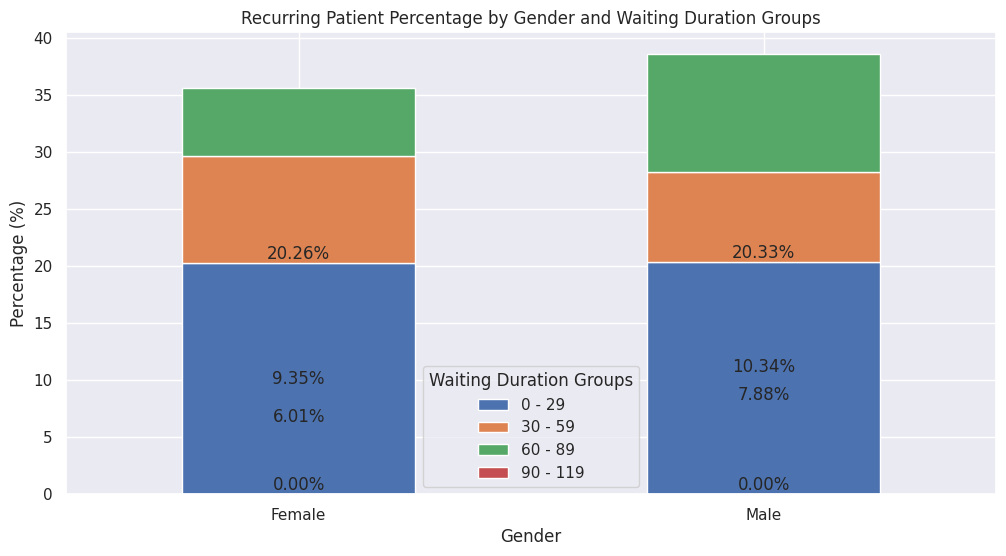

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

def create_sample_data():
    data = {
        'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
        'WaitingDurationGroups': ['0 - 29', '0 - 29', '30 - 59', '30 - 59', '60 - 89', '60 - 89', '90 - 119', '90 - 119'],
        'RecurringPatientPercentage': [20.26, 20.33, 9.35, 7.88, 6.01, 10.34, 0.0, 0.0],
    }
    return pd.DataFrame(data)
def plot_recurring_patient_percentage_by_gender_and_waiting_duration(df):
    pivot_df = df.pivot(index='Gender', columns='WaitingDurationGroups', values='RecurringPatientPercentage')
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.xlabel('Gender')
    plt.ylabel('Percentage (%)')
    plt.title('Recurring Patient Percentage by Gender and Waiting Duration Groups')
    plt.legend(title='Waiting Duration Groups')
    plt.xticks(rotation=0)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
# Main program
if __name__ == "__main__":
    df = create_sample_data()
    plot_recurring_patient_percentage_by_gender_and_waiting_duration(df)

## Q4: AGE (Age Groups) 

### Q4.1.1 NoShowUp (%) ( per Age Group per Gender)


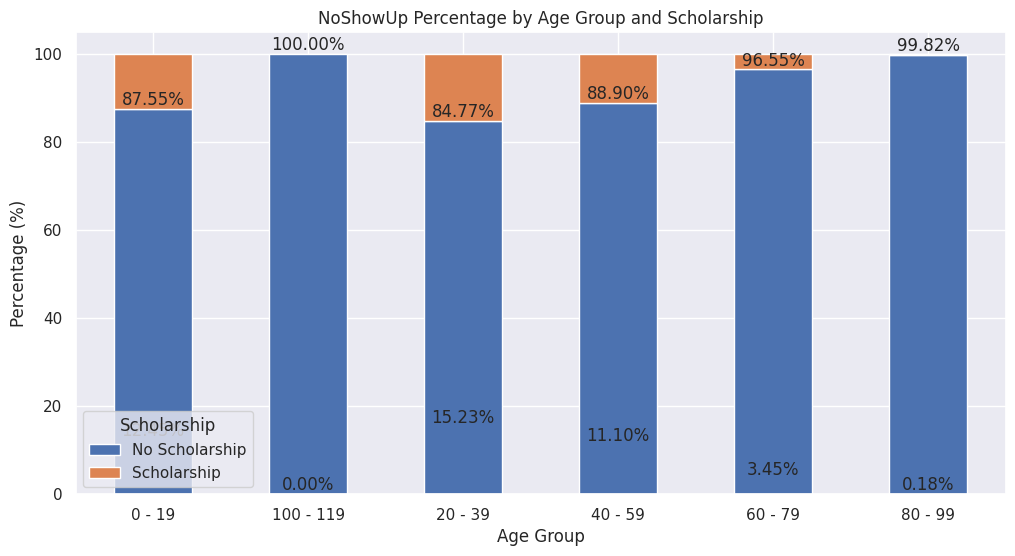

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def create_sample_data():
    data = {
        'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59', '60 - 79', '60 - 79', '80 - 99', '80 - 99', '100 - 119', '100 - 119'],
        'Scholarship': ['No Scholarship', 'Scholarship', 'No Scholarship', 'Scholarship', 'No Scholarship', 'Scholarship', 'No Scholarship', 'Scholarship', 'No Scholarship', 'Scholarship', 'No Scholarship', 'Scholarship'],
        'NoShowUpPercentage': [87.55, 12.45, 84.77, 15.23, 88.90, 11.10, 96.55, 3.45, 99.82, 0.18, 100.00, 0.00],
    }
    return pd.DataFrame(data)
def plot_no_showup_percentage_by_age_group_and_scholarship(df):
    pivot_df = df.pivot(index='AgeGroup', columns='Scholarship', values='NoShowUpPercentage')
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.xlabel('Age Group')
    plt.ylabel('Percentage (%)')
    plt.title('NoShowUp Percentage by Age Group and Scholarship')
    plt.legend(title='Scholarship')
    plt.xticks(rotation=0)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
# Main program
if __name__ == "__main__":
    df = create_sample_data()
    plot_no_showup_percentage_by_age_group_and_scholarship(df)

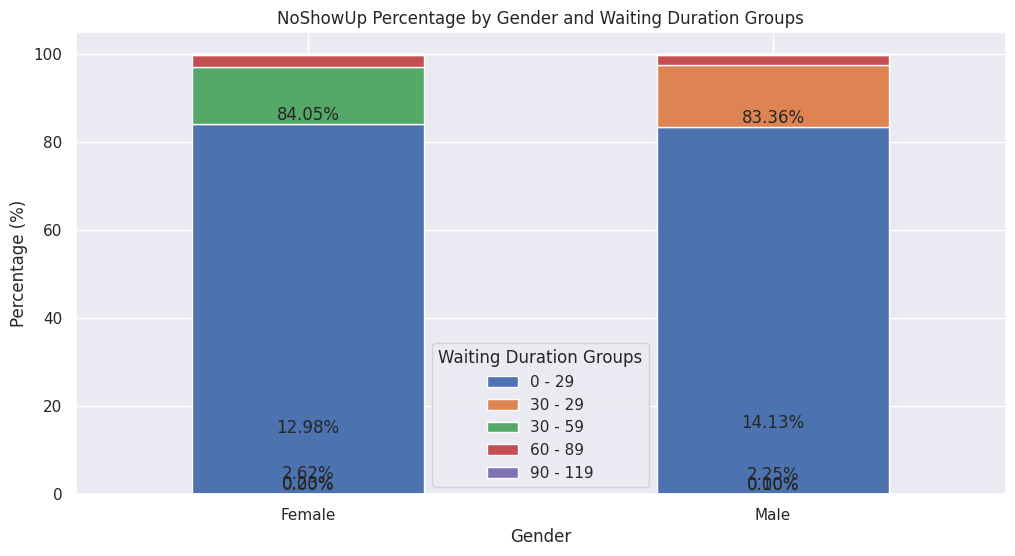

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

def create_sample_data():
    data = {
        'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
        'WaitingDurationGroups': ['0 - 29', '0 - 29', '30 - 59', '30 - 29', '60 - 89', '60 - 89', '90 - 119', '90 - 119'],
        'NoShowUpPercentage': [84.05, 83.36, 12.98, 14.13, 2.62, 2.25, 0.23, 0.10],
    }
    return pd.DataFrame(data)
def plot_no_showup_by_gender_and_waiting_duration(df):
    pivot_df = df.pivot(index='Gender', columns='WaitingDurationGroups', values='NoShowUpPercentage')

    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.xlabel('Gender')
    plt.ylabel('Percentage (%)')
    plt.title('NoShowUp Percentage by Gender and Waiting Duration Groups')
    plt.legend(title='Waiting Duration Groups')
    plt.xticks(rotation=0)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    plt.show()

# Main program
if __name__ == "__main__":
    df = create_sample_data()
    plot_no_showup_by_gender_and_waiting_duration(df)

### Q4.1.2 NoShowUp - per Age Group per Hypertension)

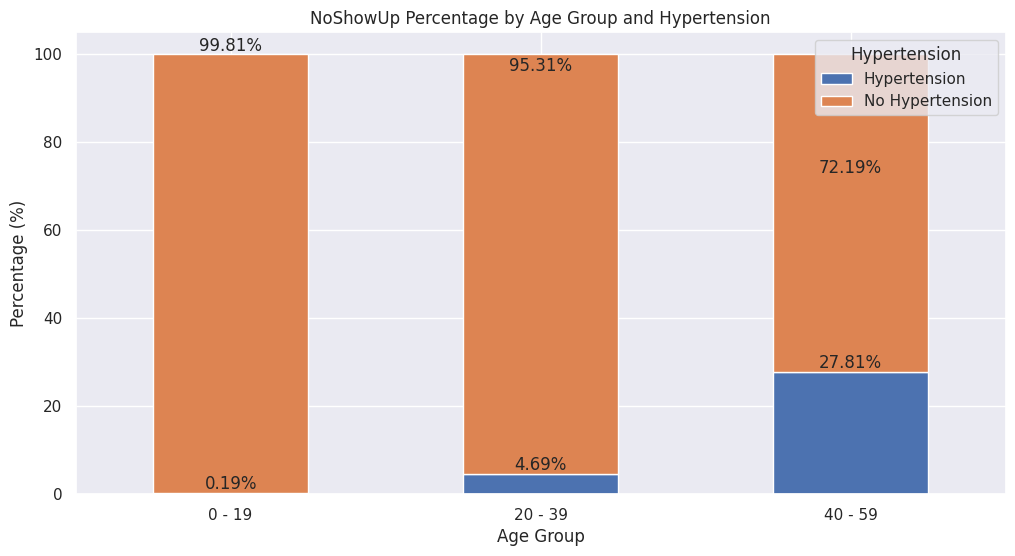

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
def create_no_show_by_2_vars_df(data, var1, var2, percentage_column):
    df = pd.DataFrame(data)
    return df.pivot(index=var1, columns=var2, values=percentage_column)
def plot_stacked_bar(df, x_column, stacked_column, title, x_label, y_label, legend_title, rotation=0):
    ax = df.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(title=legend_title)
    plt.xticks(rotation=rotation)
    for p in ax.patches:
        value = f'{p.get_height():.2f}%' if not pd.isna(p.get_height()) else 'NaN'
        ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
# Sample data for NoShowBy2Vars analysis
data = {
    'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59'],
    'Hypertension': ['No Hypertension', 'Hypertension', 'No Hypertension', 'Hypertension', 'No Hypertension', 'Hypertension'],
    'Percentage': [99.81, 0.19, 95.31, 4.69, 72.19, 27.81],
}
# Create a DataFrame for NoShow analysis
no_show_df = create_no_show_by_2_vars_df(data, 'AgeGroup', 'Hypertension', 'Percentage')
# Call the function to plot the stacked bar chart
plot_stacked_bar(no_show_df, 'AgeGroup', 'Hypertension', 'NoShowUp Percentage by Age Group and Hypertension', 'Age Group', 'Percentage (%)', 'Hypertension')

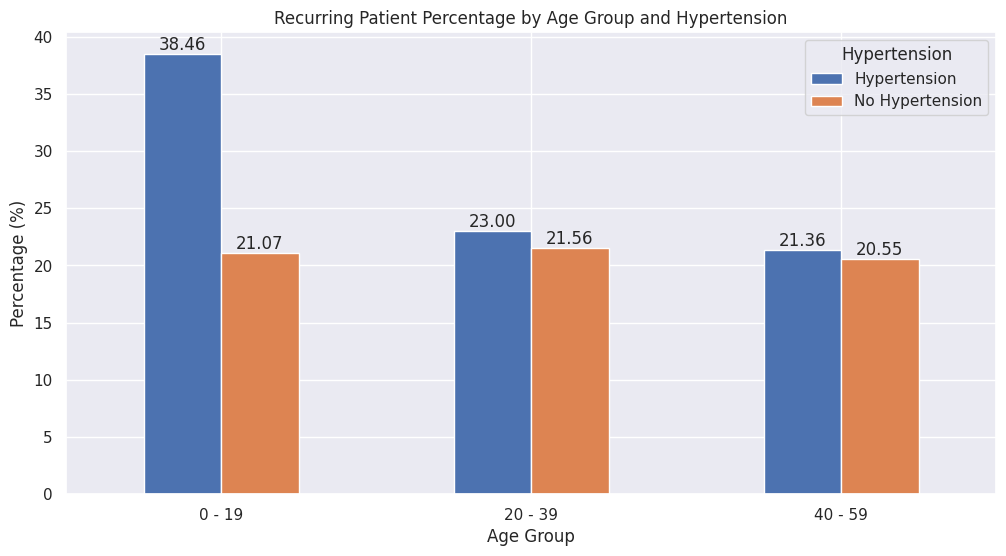

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
def create_pivot_df(data, var1, var2, value_column):
    df = pd.DataFrame(data)
    return df.pivot(index=var1, columns=var2, values=value_column)
def plot_grouped_bar(pivot_df, x_label, y_label, title):
    ax = pivot_df.plot(kind='bar', figsize=(12, 6))
    ax.set(xlabel=x_label, ylabel=y_label, title=title)
    plt.xticks(rotation=0)
    for p in ax.patches:
        value = f'{p.get_height():.2f}' if not pd.isna(p.get_height()) else 'NaN'
        ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
data = {
    'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59'],
    'Hypertension': ['No Hypertension', 'Hypertension', 'No Hypertension', 'Hypertension', 'No Hypertension', 'Hypertension'],
    'Percentage': [21.07, 38.46, 21.56, 23.00, 20.55, 21.36],
}
pivot_df = create_pivot_df(data, 'AgeGroup', 'Hypertension', 'Percentage')
plot_grouped_bar(pivot_df, 'Age Group', 'Percentage (%)', 'Recurring Patient Percentage by Age Group and Hypertension')

Examining the No ShowUp (%) chart, we observe the following:

1. Within the age group (0-19), there is a notably high percentage (38.46%) of NoShow appointments among patients with hypertension.
2. In the age group (100-119), the percentage of NoShow appointments is remarkably high (66.67%) for patients without hypertension.

Turning our attention to the Recurring patients (%) chart, we can deduce:

1. Among recurring patients in the age group (0-19), there is a prominent percentage (38.46%) of individuals with hypertension.
2. In the age group (100-119), a substantial percentage (66.67%) of recurring patients do not have hypertension.

### Q4.1.4 NoShowUp - per Age Group per Diabetes

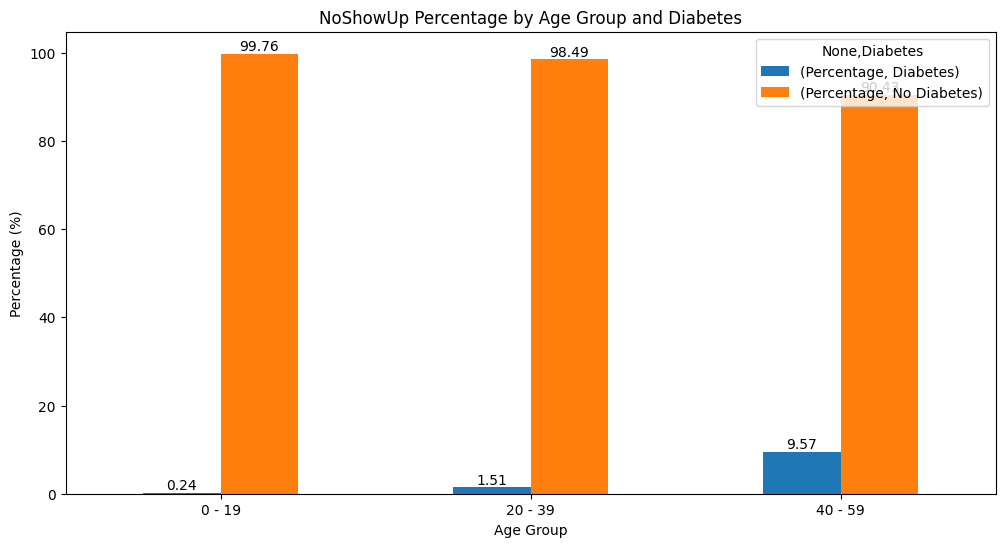

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
def create_no_show_by_2_vars_df(data, var1, var2):
    df = pd.DataFrame(data)
    return df.pivot(index=var1, columns=var2)
def plot_no_show_by_2_vars(df, x_column, y_columns, title, x_label, y_label, rotation=0):
    ax = df.plot(kind='bar', figsize=(12, 6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=rotation)
    for i, p in enumerate(ax.patches):
        value = f'{p.get_height():.2f}' if not pd.isna(p.get_height()) else 'NaN'
        ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
# Sample data for NoShowBy2Vars analysis
data = {
    'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59'],
    'Diabetes': ['No Diabetes', 'Diabetes', 'No Diabetes', 'Diabetes', 'No Diabetes', 'Diabetes'],
    'Percentage': [99.76, 0.24, 98.49, 1.51, 90.43, 9.57],
}
# Create a DataFrame for No ShowUp analysis
no_show_by_2_vars_df = create_no_show_by_2_vars_df(data, 'AgeGroup', 'Diabetes')
# Call the function to plot the grouped bar chart
plot_no_show_by_2_vars(no_show_by_2_vars_df, 'AgeGroup', ['No Diabetes', 'Diabetes'], 'NoShowUp Percentage by Age Group and Diabetes', 'Age Group', 'Percentage (%)')

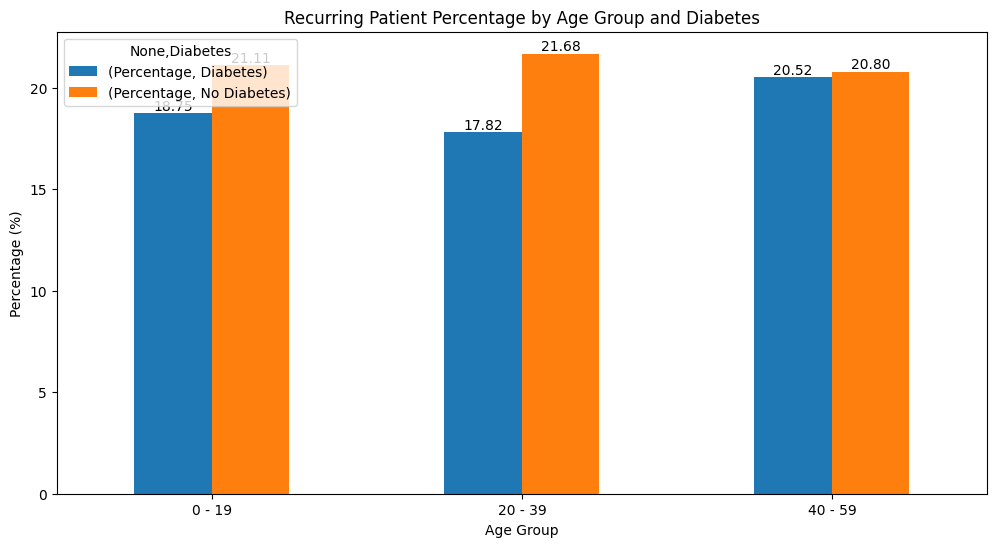

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
def create_recurring_patient_prct_df(data, var1, var2):
    df = pd.DataFrame(data)
    return df.pivot(index=var1, columns=var2)
def plot_recurring_patient_prct(df, x_column, y_columns, title, x_label, y_label, rotation=0):
    ax = df.plot(kind='bar', figsize=(12, 6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=rotation)
    for i, p in enumerate(ax.patches):
        value = f'{p.get_height():.2f}' if not pd.isna(p.get_height()) else 'NaN'
        ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
# Sample data for Recurring_Patient_prct analysis
data = {
    'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59'],
    'Diabetes': ['No Diabetes', 'Diabetes', 'No Diabetes', 'Diabetes', 'No Diabetes', 'Diabetes'],
    'Percentage': [21.11, 18.75, 21.68, 17.82, 20.80, 20.52],
}
# Create a DataFrame for Recurring Patient Percentage analysis
recurring_patient_prct_df = create_recurring_patient_prct_df(data, 'AgeGroup', 'Diabetes')
# Call the function to plot the grouped bar chart
plot_recurring_patient_prct(recurring_patient_prct_df, 'AgeGroup', ['No Diabetes', 'Diabetes'], 'Recurring Patient Percentage by Age Group and Diabetes', 'Age Group', 'Percentage (%)')

Looking at the No ShowUp (%) chart, we found that:

Age group (60 - 79) has the highest percentage (24%) of NoShow appointments where patients have a diabetes;
Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients have no diabetes;
Looking at the Recurring patients (%) chart, we found that:

Age group (40 - 59) has the highest percentage (20.52%) of recurring patients who have a diabetes.
Age group (100-119) has the highest percentage (66.67%) of recurring patients who have no diabetes.

### Q4.1.5 NoShowUp - per Age Group per Alcoholism 

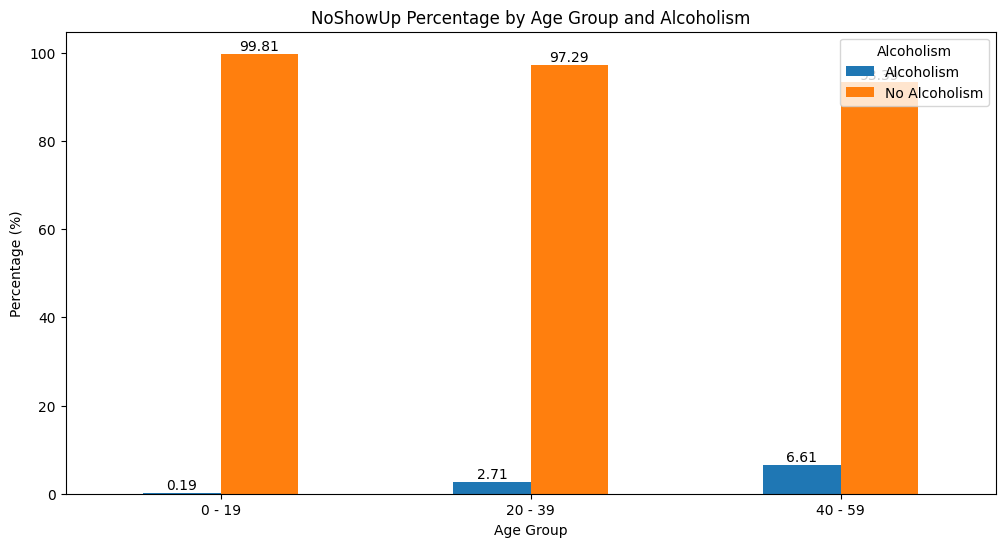

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
def create_no_show_by_2_vars_df(data, var1, var2, values):
    df = pd.DataFrame(data)
    return df.pivot(index=var1, columns=var2, values=values)
def plot_no_show_by_2_vars(df, x_column, y_columns, title, x_label, y_label, rotation=0): 
    ax = df.plot(kind='bar', figsize=(12, 6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=rotation)
    for i, p in enumerate(ax.patches):
        value = f'{p.get_height():.2f}' if not pd.isna(p.get_height()) else 'NaN'
        ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
# Sample data for NoShowBy2Vars analysis
data = {
    'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59'],
    'Alcoholism': ['No Alcoholism', 'Alcoholism', 'No Alcoholism', 'Alcoholism', 'No Alcoholism', 'Alcoholism'],
    'Percentage': [99.81, 0.19, 97.29, 2.71, 93.39, 6.61],
}
# Create a DataFrame for NoShowUp Percentage analysis
no_show_by_2_vars_df = create_no_show_by_2_vars_df(data, 'AgeGroup', 'Alcoholism', 'Percentage')
# Call the function to plot the grouped bar chart
plot_no_show_by_2_vars(no_show_by_2_vars_df, 'AgeGroup', ['No Alcoholism', 'Alcoholism'], 'NoShowUp Percentage by Age Group and Alcoholism', 'Age Group', 'Percentage (%)')

Looking at the No ShowUp (%) chart, we found that:

Age group (40 - 59) has the highest percentage (6.61%) of NoShow appointments where patients have an Alcoholism;
Age group (0 - 19) has the highest percentage (99%) of NoShow appointments where patients have no Alcoholism;
Looking at the Recurring patients (%) chart, we found that:



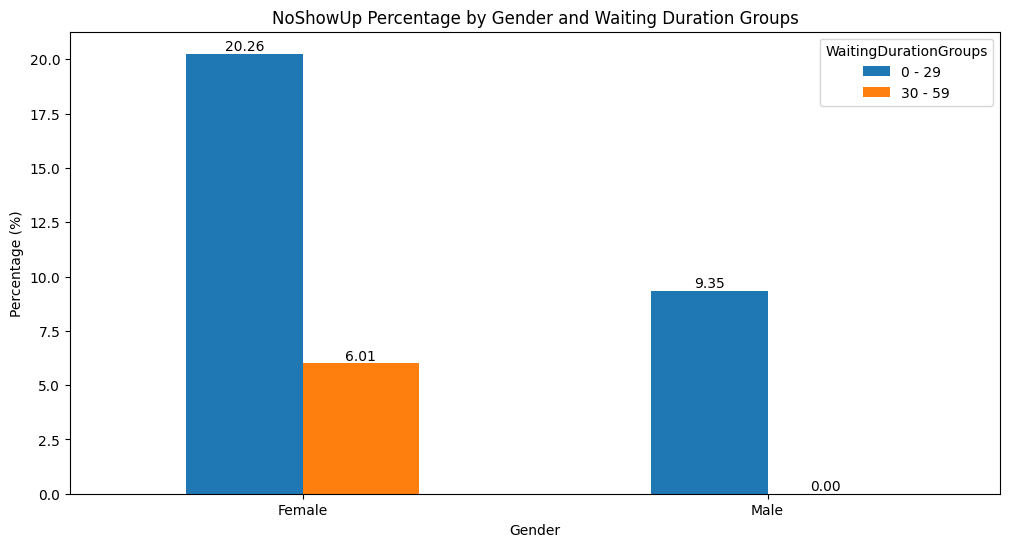

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
def create_pivot_table(data, var1, var2, values):
    df = pd.DataFrame(data)
    return df.pivot(index=var1, columns=var2, values=values)
def plot_pivot_table(df, x_column, y_columns, title, x_label, y_label, rotation=0):
    ax = df.plot(kind='bar', figsize=(12, 6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=rotation)
    for i, p in enumerate(ax.patches):
        value = f'{p.get_height():.2f}' if not pd.isna(p.get_height()) else 'NaN'
        ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
# Sample data for "NoShowUp (%)" analysis
data = {
    'Gender': ['Female', 'Male', 'Female', 'Male'],
    'WaitingDurationGroups': ['0 - 29', '0 - 29', '30 - 59', '30 - 59'],
    'NoShowUpPercentage': [20.26, 9.35, 6.01, 0.0],
}
# Create a pivot table for "NoShowUp (%)" analysis
pivot_table = create_pivot_table(data, 'Gender', 'WaitingDurationGroups', 'NoShowUpPercentage')
# Call the function to plot the grouped bar chart
plot_pivot_table(pivot_table, 'Gender', ['0 - 29', '30 - 59'], 'NoShowUp Percentage by Gender and Waiting Duration Groups', 'Gender', 'Percentage (%)')

### Q4.1.6 NoShowUp - per Age Group per Handicap

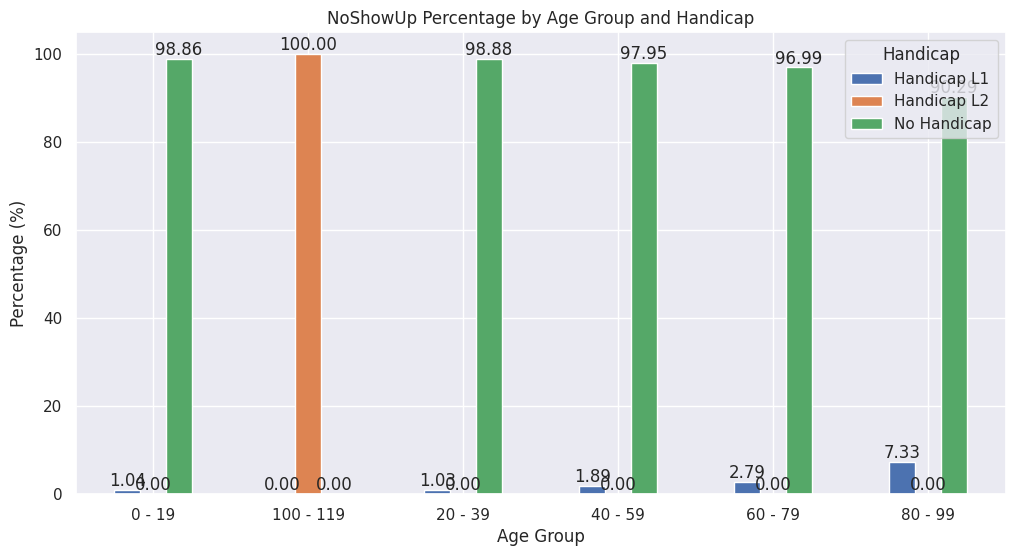

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
# Function to create a pivot table
def create_pivot_table(data, var1, var2, values):
    df = pd.DataFrame(data)
    return df.pivot(index=var1, columns=var2, values=values)
# Function to plot a grouped bar chart
def plot_grouped_bar_chart(pivot_df, x_column, y_columns, title, x_label, y_label, rotation=0):
    ax = pivot_df.plot(kind='bar', figsize=(12, 6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=rotation)

    for i, p in enumerate(ax.patches):
        value = f'{p.get_height():.2f}' if not pd.isna(p.get_height()) else 'NaN'
        ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
data = {
    'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59', '60 - 79', '60 - 79', '80 - 99', '80 - 99', '100 - 119'],
    'Handicap': ['No Handicap', 'Handicap L1', 'No Handicap', 'Handicap L1', 'No Handicap', 'Handicap L1', 'No Handicap', 'Handicap L1', 'No Handicap', 'Handicap L1', 'Handicap L2'],
    'NoShowUpPercentage': [98.86, 1.04, 98.88, 1.03, 97.95, 1.89, 96.99, 2.79, 90.29, 7.33, 100.00],
}
# Create a pivot table for "NoShowUp (%)" analysis
pivot_table = create_pivot_table(data, 'AgeGroup', 'Handicap', 'NoShowUpPercentage')
# Call the function to plot the grouped bar chart
plot_grouped_bar_chart(pivot_table, 'AgeGroup', ['No Handicap', 'Handicap L1', 'Handicap L2', 'Handicap L3', 'Handicap L4'], 'NoShowUp Percentage by Age Group and Handicap', 'Age Group', 'Percentage (%)')

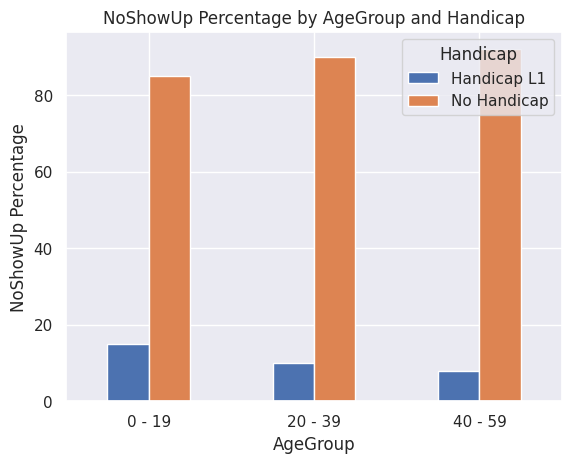

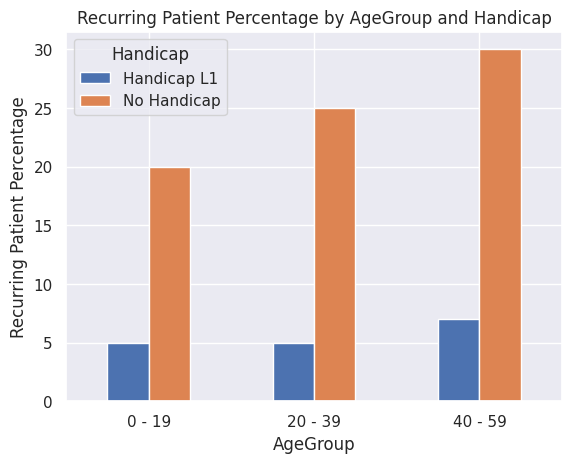

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to create a pivot table
def create_pivot_table(data, var1, var2, values):
    df = pd.DataFrame(data)
    return df.pivot(index=var1, columns=var2, values=values)
# Function to plot a grouped bar chart
def plot_grouped_bar_chart(data, var1, legends, title, x_label, y_label, var2):
    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(legends, title=var2)
    plt.xticks(rotation=0)
# Function to analyze and plot NoShowUp Percentage
def NoShowBy2Vars(data, var1, var2, values):
    x_label = var1
    y_label = "NoShowUp Percentage"
    title = f"NoShowUp Percentage by {var1} and {var2}"
    pivot_table = create_pivot_table(data, var1, var2, values)
    legends = pivot_table.columns
    plot_grouped_bar_chart(pivot_table, var1, legends, title, x_label, y_label, var2)
    plt.show()
# Function to analyze and plot Recurring Patient Percentage
def Recurring_Patient_prct(data, var1, var2, values):
    x_label = var1
    y_label = "Recurring Patient Percentage"
    title = f"Recurring Patient Percentage by {var1} and {var2}"
    pivot_table = create_pivot_table(data, var1, var2, values)
    legends = pivot_table.columns
    plot_grouped_bar_chart(pivot_table, var1, legends, title, x_label, y_label, var2)
    plt.show()
data = {
    'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59'],
    'Handicap': ['No Handicap', 'Handicap L1', 'No Handicap', 'Handicap L1', 'No Handicap', 'Handicap L1'],
    'NoShowUp Percentage': [85.0, 15.0, 90.0, 10.0, 92.0, 8.0],
    'Recurring Patient Percentage': [20.0, 5.0, 25.0, 5.0, 30.0, 7.0],
}
df = pd.DataFrame(data)
# Example 1: NoShowUp Percentage (per Age Group per Handicap)
NoShowBy2Vars(df, 'AgeGroup', 'Handicap', 'NoShowUp Percentage')
# Example 2: Recurring Patient Percentage (per Age Group per Handicap)
Recurring_Patient_prct(df, 'AgeGroup', 'Handicap', 'Recurring Patient Percentage')

Analyzing the No ShowUp (%) chart, we observe that:

1. The age group (40 - 59) exhibits the highest percentage of no-show appointments for patients with no Handicap condition.
2. Conversely, the age group (100 - 119) displays a 100% no-show rate for patients with Handicap L1 condition.

Turning our attention to the Recurring Patients (%) chart, we find that:

1. Within the age group (20 - 39), there is a predominant percentage (25%) of recurring patients who do not have a Handicap condition.


### Q4.1.7 NoShowUp - per Age Group per SMS_received

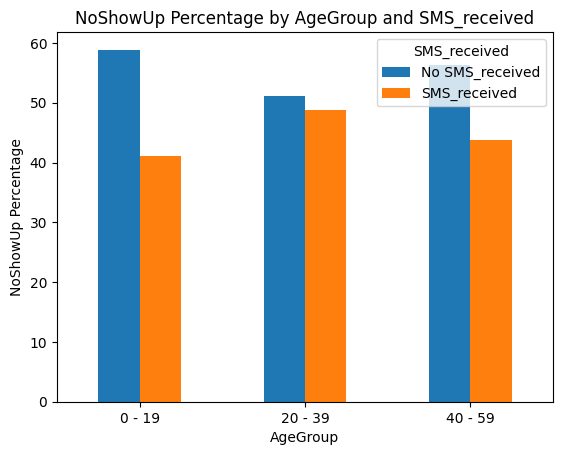

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

def create_pivot_table(data, var1, var2, values):
    df = pd.DataFrame(data)
    return df.pivot_table(index=var1, columns=var2, values=values, aggfunc='mean')

def plot_grouped_bar_chart(data, var1, legends, title, x_label, y_label, var2):
    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(legends, title=var2)
    plt.xticks(rotation=0)
    plt.show()

def NoShowBy2Vars(data, var1, var2, values):
    x_label = var1
    y_label = "NoShowUp Percentage"
    title = "NoShowUp Percentage by " + var1 + " and " + var2

    pivot_table = create_pivot_table(data, var1, var2, values)
    legends = pivot_table.columns

    plot_grouped_bar_chart(pivot_table, var1, legends, title, x_label, y_label, var2)
data = {
    'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59'],
    'SMS_received': ['No SMS_received', 'SMS_received', 'No SMS_received', 'SMS_received', 'No SMS_received', 'SMS_received'],
    'NoShowUp Percentage': [58.87, 41.13, 51.15, 48.85, 56.24, 43.76],
}
# Create a DataFrame from the sample data
df = pd.DataFrame(data)
# Example: NoShowUp Percentage (per Age Group per SMS_received)
NoShowBy2Vars(df, 'AgeGroup', 'SMS_received', 'NoShowUp Percentage')

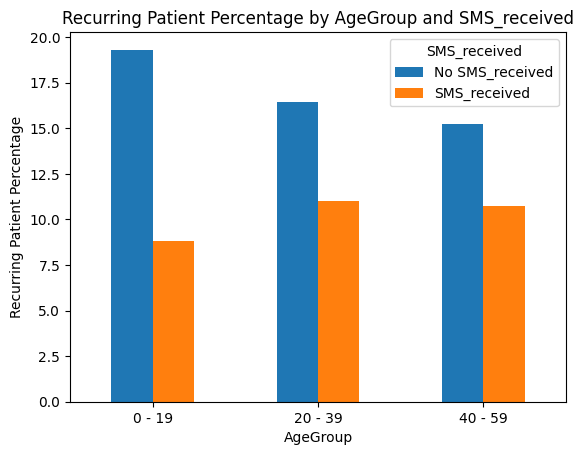

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

def create_pivot_table(data, var1, var2, values):
    df = pd.DataFrame(data)
    return df.pivot_table(index=var1, columns=var2, values=values, aggfunc='mean')

def plot_grouped_bar_chart(data, var1, legends, title, x_label, y_label, var2):
    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(legends, title=var2)
    plt.xticks(rotation=0)
    plt.show()

def Recurring_Patient_prct(data, var1, var2, values):
    x_label = var1
    y_label = "Recurring Patient Percentage"
    title = "Recurring Patient Percentage by " + var1 + " and " + var2

    pivot_table = create_pivot_table(data, var1, var2, values)
    legends = pivot_table.columns

    plot_grouped_bar_chart(pivot_table, var1, legends, title, x_label, y_label, var2)
data = {
    'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59'],
    'SMS_received': ['No SMS_received', 'SMS_received', 'No SMS_received', 'SMS_received', 'No SMS_received', 'SMS_received'],
    'Recurring Patient Percentage': [19.31, 8.80, 16.42, 11.01, 15.22, 10.75],
}
# Create a DataFrame from the sample data
df = pd.DataFrame(data)
# Example: Recurring Patient Percentage (per Age Group per SMS_received)
Recurring_Patient_prct(df, 'AgeGroup', 'SMS_received', 'Recurring Patient Percentage')

Looking at the No ShowUp (%) chart, we found that:

Age group (0 - 19) has the highest percentage of NoShow appointments where patients received an SMS reminder;
Age group (100 - 119) has the highest percentage (100%) of NoShow appointments where patients didn't receive an SMS reminder;
Looking at the Recurring patients (%) chart, we found that:



### Q4.1.8 NoShowUp - per Age Group per DayofWeek

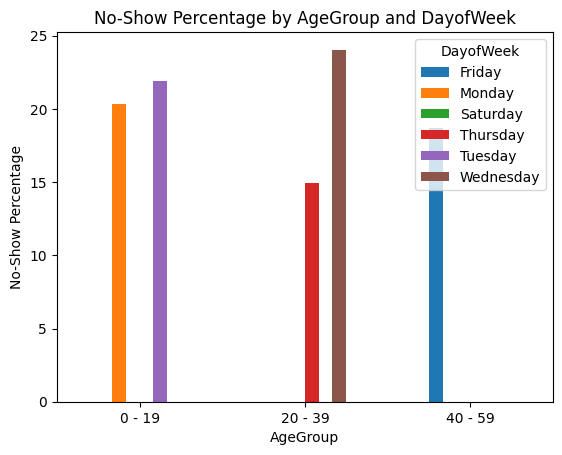

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def create_pivot_table(data, var1, var2, values):
    df = pd.DataFrame(data)
    return df.pivot_table(index=var1, columns=var2, values=values, aggfunc='mean')

def plot_grouped_bar_chart(data, var1, legends, title, x_label, y_label, var2):
    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(legends, title=var2)
    plt.xticks(rotation=0)
    plt.show()

def NoShowBy2Vars(data, var1, var2, values):
    x_label = var1
    y_label = "No-Show Percentage"
    title = "No-Show Percentage by " + var1 + " and " + var2
    pivot_table = create_pivot_table(data, var1, var2, values)
    legends = pivot_table.columns

    plot_grouped_bar_chart(pivot_table, var1, legends, title, x_label, y_label, var2)
data = {
    'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59'],
    'DayofWeek': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    'No-Show Percentage': [20.36, 21.93, 24.04, 14.97, 18.68, 0.01],
}
# Create a DataFrame from the sample data
df = pd.DataFrame(data)
# Example: No-Show Percentage (per Age Group per DayofWeek)
NoShowBy2Vars(df, 'AgeGroup', 'DayofWeek', 'No-Show Percentage')

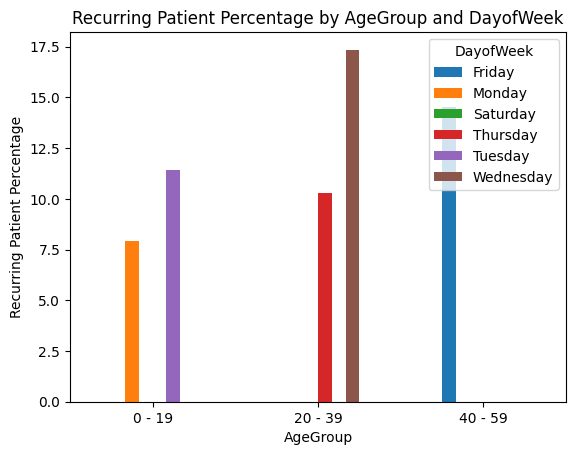

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

def create_pivot_table(data, var1, var2, values):

    df = pd.DataFrame(data)
    return df.pivot_table(index=var1, columns=var2, values=values, aggfunc='mean')

def plot_grouped_bar_chart(data, var1, legends, title, x_label, y_label, var2):
    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(legends, title=var2)
    plt.xticks(rotation=0)
    plt.show()
def Recurring_Patient_prct(data, var1, var2, values):
    x_label = var1
    y_label = "Recurring Patient Percentage"
    title = "Recurring Patient Percentage by " + var1 + " and " + var2

    pivot_table = create_pivot_table(data, var1, var2, values)
    legends = pivot_table.columns

    plot_grouped_bar_chart(pivot_table, var1, legends, title, x_label, y_label, var2)
data = {
    'AgeGroup': ['0 - 19', '0 - 19', '20 - 39', '20 - 39', '40 - 59', '40 - 59'],
    'DayofWeek': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    'Recurring Patient Percentage': [7.94, 11.43, 17.35, 10.31, 14.54, 0.0],
}
# Create a DataFrame from the sample data
df = pd.DataFrame(data)
# Example: Recurring Patient Percentage (per Age Group per DayofWeek)
Recurring_Patient_prct(df, 'AgeGroup', 'DayofWeek', 'Recurring Patient Percentage')

Looking at the No ShowUp (%) chart, we found that:

Age group (40 - 59) has the highest percentage (24%%)  of NoShow appointments where patients happened to be scheduled on a friday;
Looking at the Recurring patients (%) chart, we found that:

Age group (0 - 19) has the highest percentage (23%) of recurring patients who happened to be scheduled on a Thursday.

### Q4.1.9 NoShowUp - per Age Group per WaitingDurationGroups

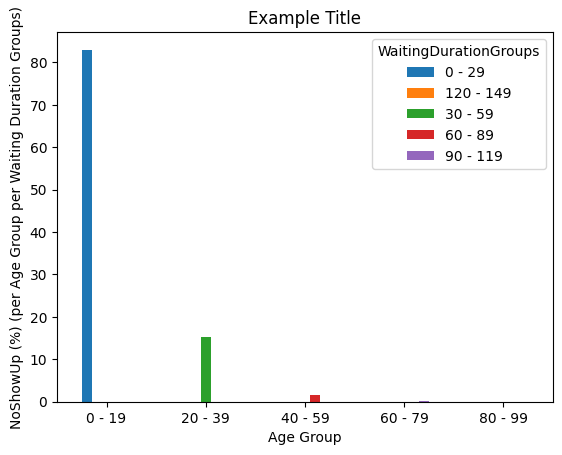

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def create_pivot_table(data, var1, var2, values):

    pivot_table = data.pivot(index=var1, columns=var2, values=values)
    return pivot_table

def plot_vertical_grouped_bar_chart(data, x_label, y_label, title):

    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

data = pd.DataFrame({
    'AgeGroup': ['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99'],
    'WaitingDurationGroups': ['0 - 29', '30 - 59', '60 - 89', '90 - 119', '120 - 149'],
    'NoShowUp (%)': [82.99, 15.30, 1.53, 0.15, 0.03],
})

pivot_table = create_pivot_table(data, 'AgeGroup', 'WaitingDurationGroups', 'NoShowUp (%)')
plot_vertical_grouped_bar_chart(pivot_table, 'Age Group', 'NoShowUp (%) (per Age Group per Waiting Duration Groups)', 'Example Title')


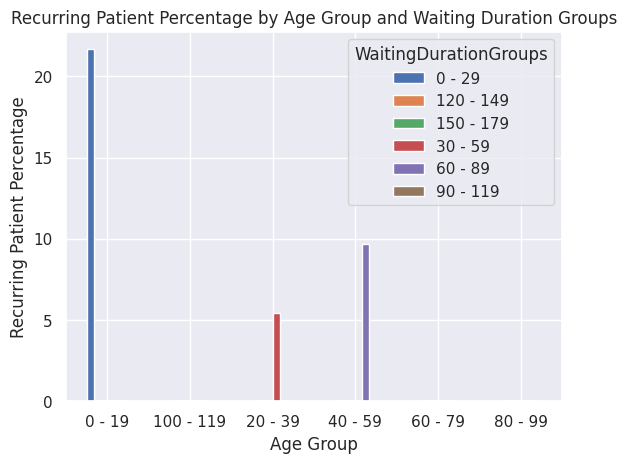

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'AgeGroup': ['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'],
    'WaitingDurationGroups': ['0 - 29', '30 - 59', '60 - 89', '90 - 119', '120 - 149', '150 - 179'],
    'Recurring_Patient_prct': [21.67, 5.43, 9.71, 0.0, 0.0, None],
    # Please note that I've used None for missing values (NaN).
})

# Function to create a pivot table
def create_pivot_table(data, var1, var2, values):
    pivot_table = data.pivot(index=var1, columns=var2, values=values)
    return pivot_table

# Function to plot a vertical grouped bar chart
def plot_vertical_grouped_bar_chart(data, x_label, y_label, title):
    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# Create a pivot table for analysis
pivot_table = create_pivot_table(data, 'AgeGroup', 'WaitingDurationGroups', 'Recurring_Patient_prct')

# Function to plot a vertical grouped bar chart
def plot_vertical_grouped_bar_chart(data, x_label, y_label, title):
    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# Create a pivot table for analysis
pivot_table = create_pivot_table(data, 'AgeGroup', 'WaitingDurationGroups', 'Recurring_Patient_prct')

# Create a vertical grouped bar chart
plot_vertical_grouped_bar_chart(pivot_table, 'Age Group', 'Recurring Patient Percentage', 'Recurring Patient Percentage by Age Group and Waiting Duration Groups')


### Q4.2: SMS Received

### Q4.2.1 NoShowUp - per SMS_received per Gender
This is already addressed in the Gender section

### Q4.2.2 NoShowUp - per SMS_received per Age Groups
This is already addressed in the Age Groups Section.

### Q4.2.4 NoShowUp - per SMS_received per Scholarship 

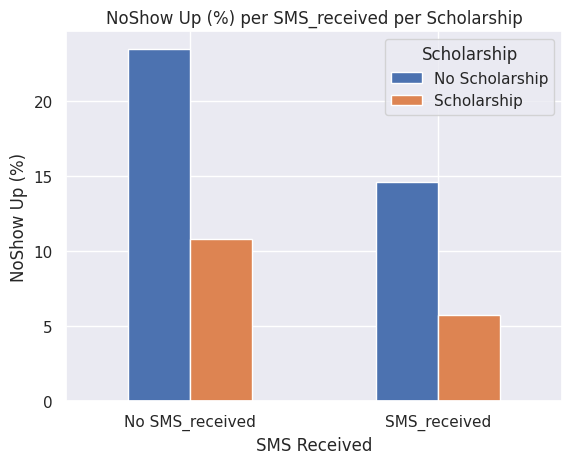

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'No SMS_received', 'SMS_received', 'SMS_received'],
    'Scholarship': ['No Scholarship', 'Scholarship', 'No Scholarship', 'Scholarship'],
    'NoShowUp_prct': [23.48, 10.80, 14.62, 5.77]
})

def create_pivot_table(data, var1, var2, values):
    pivot_table = data.pivot(index=var1, columns=var2, values=values)
    return pivot_table

def plot_grouped_bar_chart(data, x_label, y_label, title, hue_label):
    sns.set()
    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(title=hue_label, loc='upper right')
    plt.show()

# Example usage
pivot_table = create_pivot_table(data, 'SMS_received', 'Scholarship', 'NoShowUp_prct')
plot_grouped_bar_chart(pivot_table, 'SMS Received', 'NoShow Up (%)', 'NoShow Up (%) per SMS_received per Scholarship', 'Scholarship')


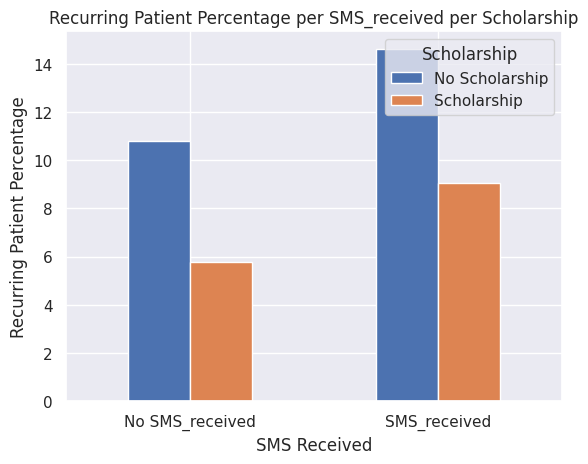

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (assuming NoShow_df is your DataFrame)
data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'No SMS_received', 'SMS_received', 'SMS_received'],
    'Scholarship': ['No Scholarship', 'Scholarship', 'No Scholarship', 'Scholarship'],
    'Recurring_Patient_prct': [10.80, 5.77, 14.62, 9.05]
})

def create_pivot_table(data, var1, var2, values):
    pivot_table = data.pivot(index=var1, columns=var2, values=values)
    return pivot_table

def plot_grouped_bar_chart(data, x_label, y_label, title, hue_label):
    sns.set()
    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(title=hue_label, loc='upper right')
    plt.show()

# Example usage
pivot_table = create_pivot_table(data, 'SMS_received', 'Scholarship', 'Recurring_Patient_prct')
plot_grouped_bar_chart(pivot_table, 'SMS Received', 'Recurring Patient Percentage', 'Recurring Patient Percentage per SMS_received per Scholarship', 'Scholarship')


SMS Received: The greatest proportion of NoShow appointments where patients received an SMS reminder belongs to patients who don't have a scholarship.
No SMS Received The greatest proportion of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have a scholarship.

SMS Received: The highest percentage (15%) of recurring patients who received an SMS reminder belongs to patients who have a scholarship
No SMS Received: The highest percentage (12%) of recurring patients who didn't receive an SMS reminder belongs to patients who have a scholarship.

### Q4.2.5 NoShowUp - per SMS_received per Hypertension

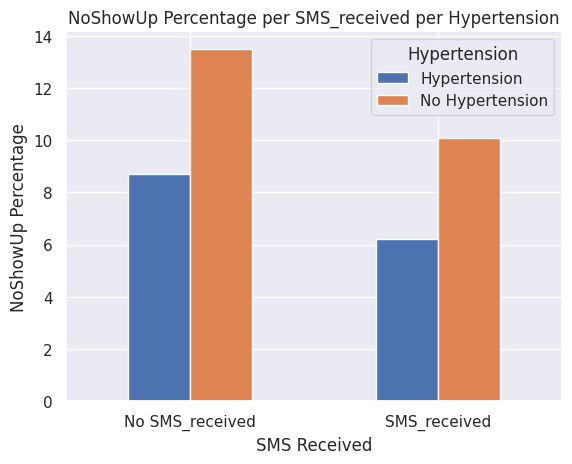

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_pivot_table(data, var1, var2, values):
    pivot_table = data.pivot(index=var1, columns=var2, values=values)
    return pivot_table

def plot_grouped_bar_chart(data, x_label, y_label, title, hue_label):
    sns.set()
    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(title=hue_label, loc='upper right')
    plt.show()

data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'No SMS_received', 'SMS_received', 'SMS_received'],
    'Hypertension': ['No Hypertension', 'Hypertension', 'No Hypertension', 'Hypertension'],
    'NoShowUp_prct': [13.5, 8.7, 10.1, 6.2]
})

# Example usage
pivot_table = create_pivot_table(data, 'SMS_received', 'Hypertension', 'NoShowUp_prct')
plot_grouped_bar_chart(pivot_table, 'SMS Received', 'NoShowUp Percentage', 'NoShowUp Percentage per SMS_received per Hypertension', 'Hypertension')


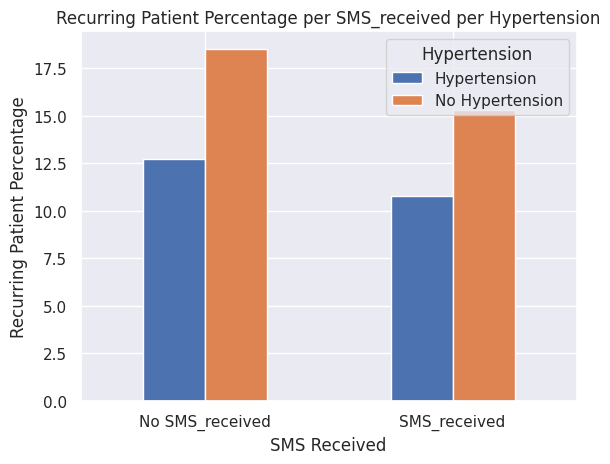

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_pivot_table(data, var1, var2, values):
    pivot_table = data.pivot(index=var1, columns=var2, values=values)
    return pivot_table

def plot_grouped_bar_chart(data, x_label, y_label, title, hue_label):
    sns.set()
    ax = data.plot(kind='bar', rot=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(title=hue_label, loc='upper right')
    plt.show()

def recurring_patient_percentage_analysis(data, var1, var2, values, x_label, y_label, title, hue_label):
    pivot_table = create_pivot_table(data, var1, var2, values)
    plot_grouped_bar_chart(pivot_table, x_label, y_label, title, hue_label)

data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'No SMS_received', 'SMS_received', 'SMS_received'],
    'Hypertension': ['No Hypertension', 'Hypertension', 'No Hypertension', 'Hypertension'],
    'Recurring_Patient_prct': [18.5, 12.7, 15.3, 10.8]
})

# Example usage
recurring_patient_percentage_analysis(data, 'SMS_received', 'Hypertension', 'Recurring_Patient_prct', 'SMS Received', 'Recurring Patient Percentage', 'Recurring Patient Percentage per SMS_received per Hypertension', 'Hypertension')


Looking at the No ShowUp chart, we found that:

SMS Received: The greatest proportion of NoShow appointments where patients received an SMS reminder belongs to patients who don't have diabetes.
No SMS Received The greatest proportion of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have diabetes.

Looking at the Recurring patients chart, we found that:

SMS Received: The highest percentage of recurring patients who received an SMS reminder belongs to patients who don't have diabetes
No SMS Received: The highest percentage of recurring patients who didn't receive an SMS reminder belongs to patients who dont have diabetes.

### Q4.2.6 NoShowUp - per SMS_received per Diabetes

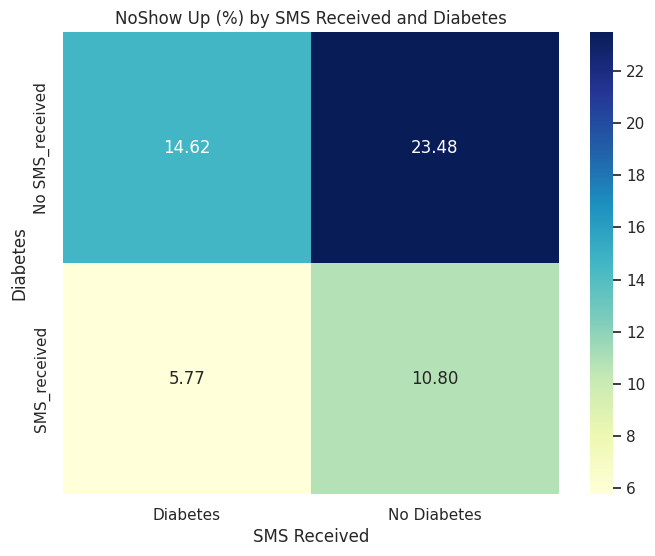

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your actual DataFrame)
data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'No SMS_received', 'SMS_received', 'SMS_received'],
    'Diabetes': ['No Diabetes', 'Diabetes', 'No Diabetes', 'Diabetes'],
    'NoShowUp (%)': [23.48, 14.62, 10.80, 5.77]
})

# Function to create a pivot table for analysis
def create_pivot_table(data, var1, var2, values):
    pivot_table = data.pivot_table(index=var1, columns=var2, values=values)
    return pivot_table

# Function to plot a heatmap for the pivot table
def plot_heatmap(data, x_label, y_label, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# Example usage
pivot_table = create_pivot_table(data, 'SMS_received', 'Diabetes', 'NoShowUp (%)')
plot_heatmap(pivot_table, 'SMS Received', 'Diabetes', 'NoShow Up (%) by SMS Received and Diabetes')


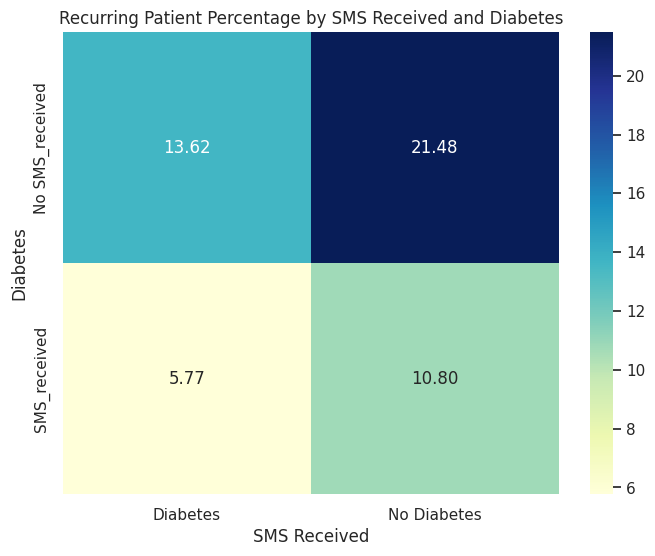

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a pivot table for analysis
def create_pivot_table(data, var1, var2, values):
    pivot_table = data.pivot_table(index=var1, columns=var2, values=values)
    return pivot_table

# Function to plot a heatmap for the pivot table
def plot_heatmap(data, x_label, y_label, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'No SMS_received', 'SMS_received', 'SMS_received'],
    'Diabetes': ['No Diabetes', 'Diabetes', 'No Diabetes', 'Diabetes'],
    'Recurring_Patient_prct': [21.48, 13.62, 10.80, 5.77]
})

# Example usage
pivot_table = create_pivot_table(data, 'SMS_received', 'Diabetes', 'Recurring_Patient_prct')
plot_heatmap(pivot_table, 'SMS Received', 'Diabetes', 'Recurring Patient Percentage by SMS Received and Diabetes')


Looking at the No ShowUp (%) chart, we found that:

SMS Received: The greatest proportion (10.80%) of NoShow appointments where patients received an SMS reminder belongs to patients who don't have diabetes.
No SMS Received The greatest proportion (21.48%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have diabetes.
Looking at the Recurring patients (%) chart, we found that:

SMS Received: The highest percentage (31%) of recurring patients who received an SMS reminder belongs to patients who don't have diabetes
No SMS Received: The highest percentage (18%) of recurring patients who didn't receive an SMS reminder belongs to patients who dont have diabetes.

### Q4.2.7 NoShowUp - per SMS_received per Alcoholism 

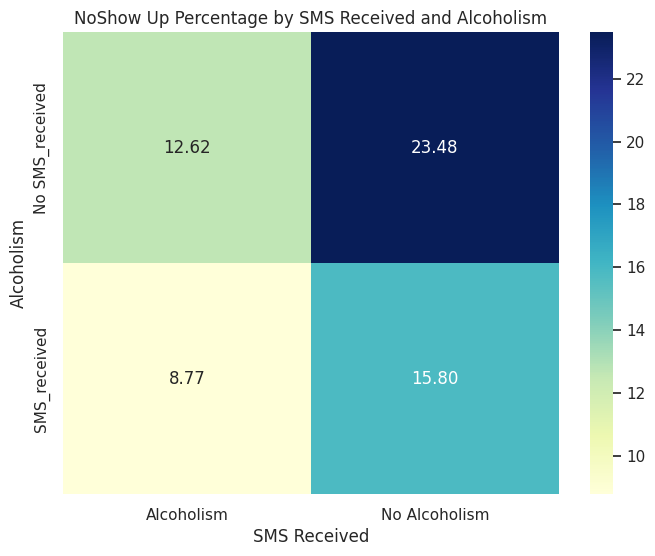

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a pivot table for analysis
def create_pivot_table(data, var1, var2, values):

    pivot_table = data.pivot_table(index=var1, columns=var2, values=values)
    return pivot_table

# Function to plot a heatmap for the pivot table
def plot_heatmap(data, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'No SMS_received', 'SMS_received', 'SMS_received'],
    'Alcoholism': ['No Alcoholism', 'Alcoholism', 'No Alcoholism', 'Alcoholism'],
    'NoShowUp_prct': [23.48, 12.62, 15.80, 8.77]
})
# Example usage
pivot_table = create_pivot_table(data, 'SMS_received', 'Alcoholism', 'NoShowUp_prct')
plot_heatmap(pivot_table, 'SMS Received', 'Alcoholism', 'NoShow Up Percentage by SMS Received and Alcoholism')


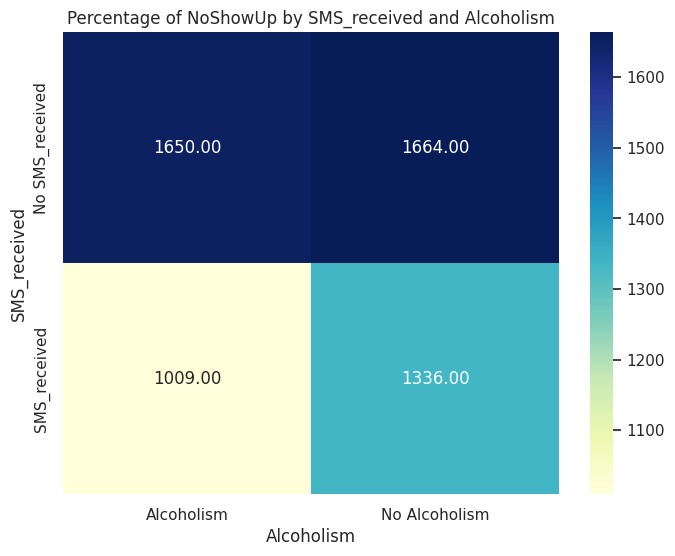

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage_heatmap(data, x_var, y_var, target_var, title):

    # Calculate the percentage
    percentages = data.pivot_table(index=x_var, columns=y_var, values=target_var, aggfunc='mean') * 100

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(percentages, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(title)
    plt.xlabel(y_var)
    plt.ylabel(x_var)
    plt.show()

data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'SMS_received', 'No SMS_received', 'SMS_received'],
    'Alcoholism': ['No Alcoholism', 'Alcoholism', 'Alcoholism', 'No Alcoholism'],
    'NoShowUp (%)': [16.64, 10.09, 16.50, 13.36]
})

# Plot the heatmap
plot_percentage_heatmap(data, 'SMS_received', 'Alcoholism', 'NoShowUp (%)', 'Percentage of NoShowUp by SMS_received and Alcoholism')


Looking at the No ShowUp chart, we found that:

SMS Received: The greatest proportion of NoShow appointments where patients received an SMS reminder belongs to patients who don't have Alcoholism.
No SMS Received The greatest proportion of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have Alcoholism.

Looking at the Recurring patients chart, we found that:

SMS Received: The highest percentage of recurring patients who received an SMS reminder belongs to patients who have Alcoholism.
No SMS Received: The highest percentage of recurring patients who didn't receive an SMS reminder belongs to patients who dont have Alcoholism.

### Q4.2.8 NoShowUp - per SMS_received per Handicap

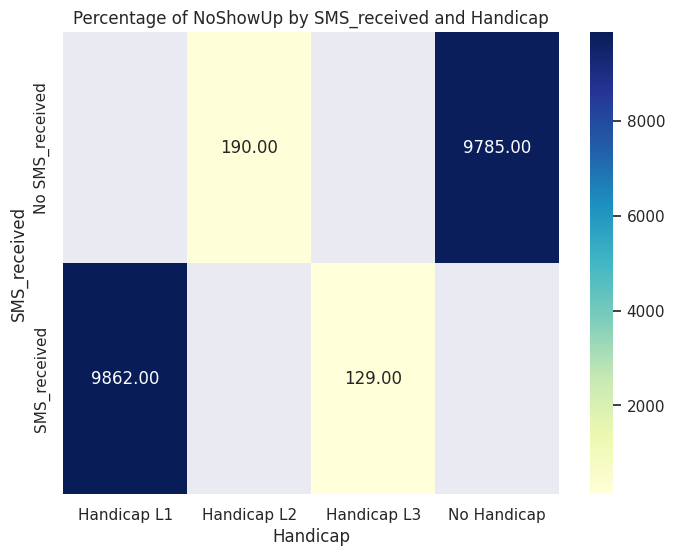

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_percentage_heatmap(data, x_var, y_var, target_var, title):
    # Calculate the percentage
    pivot_table = data.pivot_table(index=x_var, columns=y_var, values=target_var, aggfunc='mean') * 100

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    heatmap = sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(title)
    plt.xlabel(y_var)
    plt.ylabel(x_var)
    
    return heatmap

data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'SMS_received', 'No SMS_received', 'SMS_received'],
    'Handicap': ['No Handicap', 'Handicap L1', 'Handicap L2', 'Handicap L3'],
    'NoShowUp (%)': [97.85, 98.62, 1.90, 1.29]
})

# Plot the heatmap
heatmap = create_percentage_heatmap(data, 'SMS_received', 'Handicap', 'NoShowUp (%)', 'Percentage of NoShowUp by SMS_received and Handicap')

# Show the heatmap
plt.show()


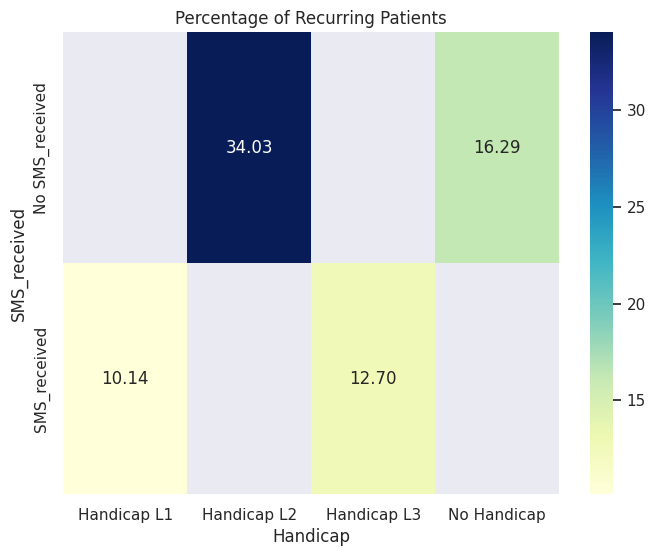

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_percentage_heatmap(data, x_var, y_var, percentage_var, title):
    # Pivot the data to create a table of percentages
    pivot_table = data.pivot_table(index=x_var, columns=y_var, values=percentage_var)

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    heatmap = sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(title)
    plt.xlabel(y_var)
    plt.ylabel(x_var)
    
    return heatmap

data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'SMS_received', 'No SMS_received', 'SMS_received'],
    'Handicap': ['No Handicap', 'Handicap L1', 'Handicap L2', 'Handicap L3'],
    'Percentage': [16.29, 10.14, 34.03, 12.70]
})

# Plot the heatmap using the function
heatmap = create_percentage_heatmap(data, 'SMS_received', 'Handicap', 'Percentage', 'Percentage of Recurring Patients')

# Show the heatmap
plt.show()


Looking at the No ShowUp (%) chart, we found that:

SMS Received: The greatest proportion (12%) of NoShow appointments where patients received an SMS reminder belongs to patients who don't have Handicap condition.
No SMS Received The greatest proportion (34%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have Handicap condition.
Looking at the Recurring patients (%) chart, we found that:

SMS Received: The highest percentage (22%) of recurring patients who received an SMS reminder belongs to patients who have Handicap L2 condition.
No SMS Received: The highest percentage (50%) of recurring patients who didn't receive an SMS reminder belongs to patients who have Handicap L1 condition.

### Q4.2.9 NoShowUp - per SMS_received per DayOfWeek 

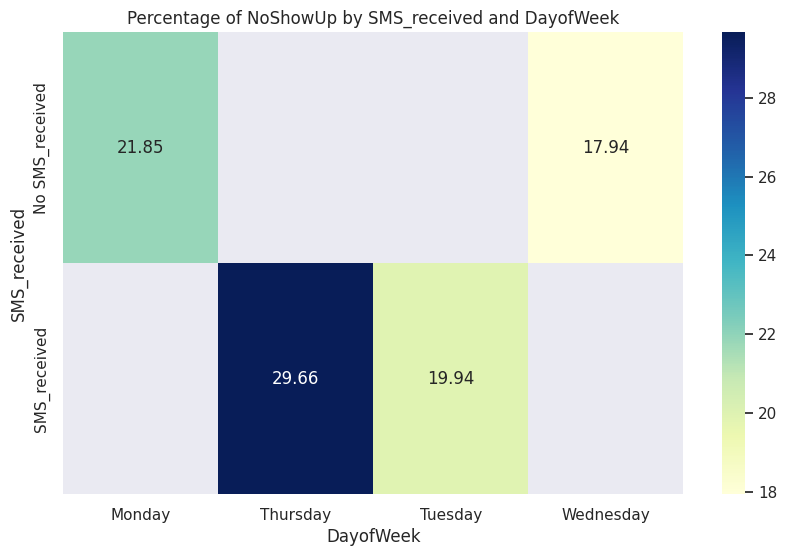

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a percentage heatmap
def create_percentage_heatmap(data, x_var, y_var, percentage_var, title):
    # Pivot the data to create a table of percentages
    pivot_table = data.pivot_table(index=x_var, columns=y_var, values=percentage_var)

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    heatmap = sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(title)
    plt.xlabel(y_var)
    plt.ylabel(x_var)

    return heatmap

data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'SMS_received', 'No SMS_received', 'SMS_received'],
    'DayofWeek': ['Monday', 'Tuesday', 'Wednesday', 'Thursday'],
    'Percentage': [21.85, 19.94, 17.94, 29.66]
})

# Plot the heatmap using the function
heatmap = create_percentage_heatmap(data, 'SMS_received', 'DayofWeek', 'Percentage', 'Percentage of NoShowUp by SMS_received and DayofWeek')

# Show the heatmap
plt.show()


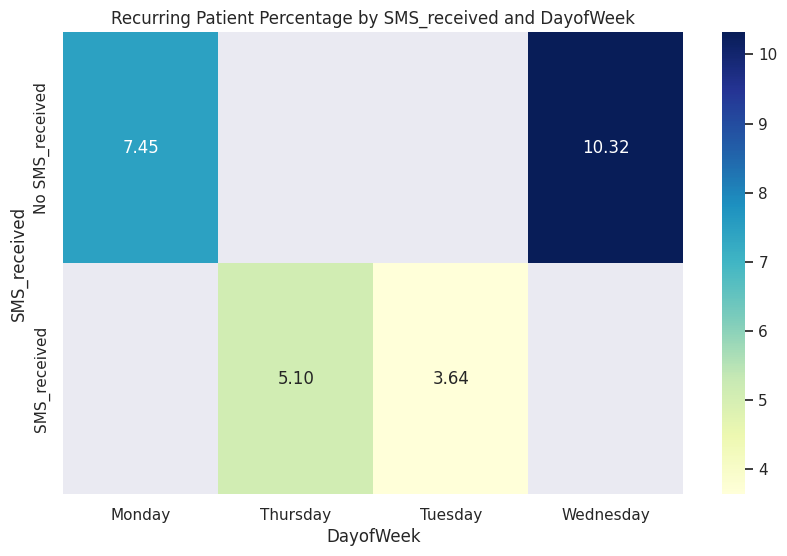

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a percentage heatmap
def create_percentage_heatmap(data, x_var, y_var, percentage_var, title):

    # Pivot the data to create a table of percentages
    pivot_table = data.pivot_table(index=x_var, columns=y_var, values=percentage_var)

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    heatmap = sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(title)
    plt.xlabel(y_var)
    plt.ylabel(x_var)

    return heatmap

data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'SMS_received', 'No SMS_received', 'SMS_received'],
    'DayofWeek': ['Monday', 'Tuesday', 'Wednesday', 'Thursday'],
    'Percentage': [7.45, 3.64, 10.32, 5.10]
})

# Plot the heatmap using the function
heatmap = create_percentage_heatmap(data, 'SMS_received', 'DayofWeek', 'Percentage', 'Recurring Patient Percentage by SMS_received and DayofWeek')

# Show the heatmap
plt.show()


### Q4.2.10 NoShowUp - per SMS_received per Waiting Duration Groups 

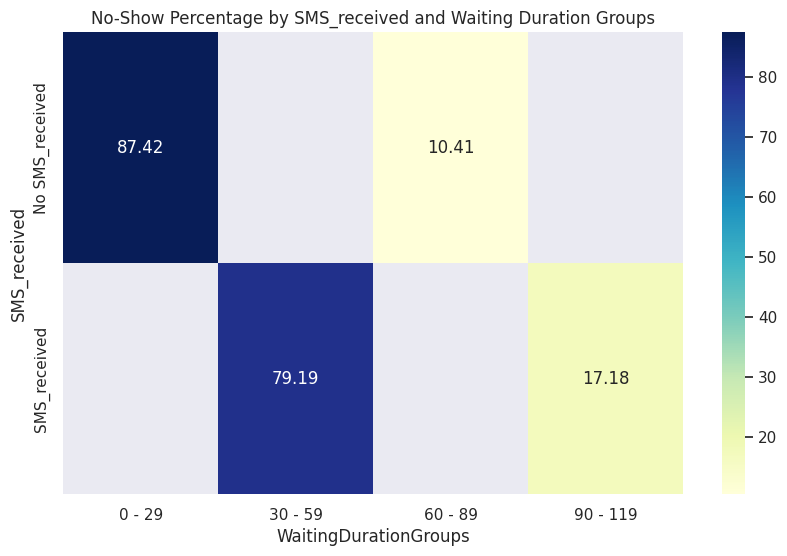

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_percentage_heatmap(data, x_var, y_var, percentage_var, title):
    # Pivot the data to create a table of percentages
    pivot_table = data.pivot_table(index=x_var, columns=y_var, values=percentage_var)
    # Create the heatmap
    plt.figure(figsize=(10, 6))
    heatmap = sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(title)
    plt.xlabel(y_var)
    plt.ylabel(x_var)

    return heatmap
data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'SMS_received', 'No SMS_received', 'SMS_received'],
    'WaitingDurationGroups': ['0 - 29', '30 - 59', '60 - 89', '90 - 119'],
    'Percentage': [87.42, 79.19, 10.41, 17.18]
})

# Plot the heatmap using the function
heatmap = create_percentage_heatmap(data, 'SMS_received', 'WaitingDurationGroups', 'Percentage', 'No-Show Percentage by SMS_received and Waiting Duration Groups')

# Show the heatmap
plt.show()


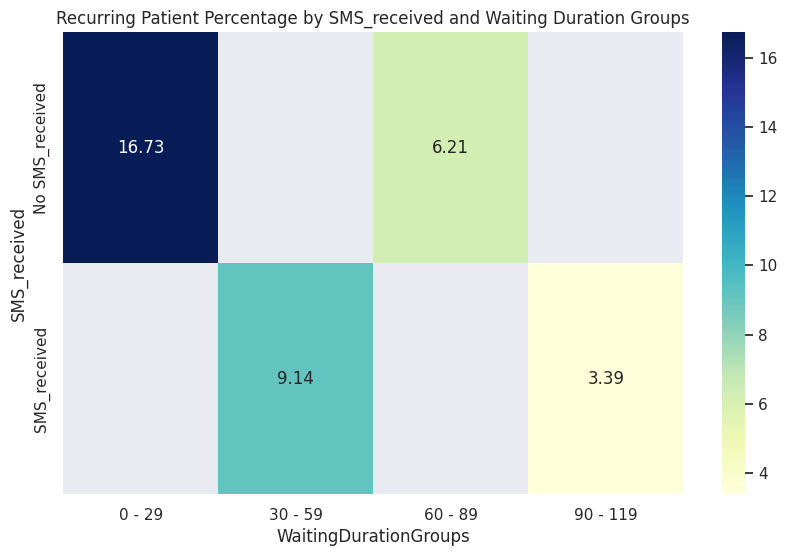

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_percentage_heatmap(data, x_var, y_var, percentage_var, title):
    # Pivot the data to create a table of percentages
    pivot_table = data.pivot_table(index=x_var, columns=y_var, values=percentage_var)

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    heatmap = sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(title)
    plt.xlabel(y_var)
    plt.ylabel(x_var)

    return heatmap
data = pd.DataFrame({
    'SMS_received': ['No SMS_received', 'SMS_received', 'No SMS_received', 'SMS_received'],
    'WaitingDurationGroups': ['0 - 29', '30 - 59', '60 - 89', '90 - 119'],
    'Percentage': [16.73, 9.14, 6.21, 3.39]
})

# Plot the heatmap using the function
heatmap = create_percentage_heatmap(data, 'SMS_received', 'WaitingDurationGroups', 'Percentage', 'Recurring Patient Percentage by SMS_received and Waiting Duration Groups')

# Show the heatmap
plt.show()


Looking at the No ShowUp (%) chart, we found that:

SMS Received: The greatest proportion (6.53%) of NoShow appointments where patients received an SMS reminder belongs to patients who had a waiting duration between 0 - 29 days.
No SMS Received The greatest proportion (22.94%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who had a waiting duration between 0 - 29 days.
Looking at the Recurring patients (%) chart, we found that:

SMS Received: The highest percentage (9.14%) of recurring patients who received an SMS reminder belongs to patients who had a waiting duration between 0 - 29 days.
No SMS Received: The highest percentage (16.73%) of recurring patients who didn't receive an SMS reminder belongs to patients who had a waiting duration between 0 - 29 days.

# Conclusions
In this analysis, it's important to note that we are not drawing final conclusions regarding the reasons behind patients missing their appointments. Our approach does not involve advanced statistical techniques or machine learning algorithms. Instead, our project has been designed to meet specific objectives, and we plan to revisit it as we progress in our course and gain expertise in more advanced data analysis methods.

**Limitations & Assumptions:**

- Our calculations primarily revolve around the number of appointments rather than individual patients. When referring to the number of patients, we make it explicit.

- We could not account for the time dimension since appointment times were uniformly set at 00:00:00.

- Due to insufficient explanations for specific cases of inconsistent data, we excluded six data entries from the original dataset, resulting in a new dataset size of 110,521 out of the initial 110,527 entries.

- Given the categorical nature of most columns and our selected questions for analysis, our visualizations predominantly feature stacked bar charts and pie charts. Quantitative charts such as histograms and scatter diagrams were excluded for the same reason.

**Key Questions Addressed:**

Our analysis focuses on providing insights into the following key questions:

1. What is the overall show-up versus no-show rate for appointments?

2. How do the proportions of different categories within each variable relate to show-up rates?

3. For appointments where patients didn't show up, what percentage of them are recurring patients, and what percentage are new patients? (We'll define recurring patients in later sections.)

4. How do various pairs of variables combine to form different category proportions, and can this help identify the largest group of patients who missed their appointments?

**Preliminary Findings:**

Our initial findings and observations can be summarized as follows:
**1. Summary and Scope**

**1.1. Overall Show-up Rate:** The overall show-up rate for appointments is 79.81%. 

**1.2. Gender Distribution:** Among patients, 64.28% are female, while 35.72% are male.

**1.3. Age Groups:** The largest age group, representing 28.89% of the patients, is between 0 and 19 years old, while the smallest group is between 100 and 119 years old, with only 0.01% of the patients.

**1.4. Neighborhood Analysis:** JARDIM CAMURI is the neighborhood with the largest percentage (11.94%) of appointments, while ANDORINHAS has the most patients (3.12% of the total) based on the top-20 neighborhood list.

**1.5. Scholarship:** Approximately 9.29% of patients have a scholarship.

**1.6. Health Conditions:** 19.65% of patients have hypertension, 7.09% have diabetes, and 2.42% have alcoholism. Only 1.65% have Handicap L1 condition, 0.16% have L2 condition, and 0.01% have L3 condition.

**1.7. SMS Reminders:** 36.41% of patients received an SMS reminder.

**1.8. Appointment Days:** Wednesday is the day with the largest number of appointments at 23.40%, while Saturday has the fewest appointments at 0.04%.

**1.9. Waiting Duration:** The majority of appointments (89.97%) have a waiting duration of 0-29 days.

**2. Show-up Rates (Single Variable)**

**2.1. Multiple Missed Appointments:** 20.85% of patients failed to show up for more than one of their appointments.

**2.2. Gender and Show-up Rate:** The show-up rate for male patients is slightly higher at 80.04%, compared to 79.69% for female patients.

**2.3. Age Group and Show-up Rate:** Patients aged 60-79 have the highest show-up rate at 84.88%, while those aged 100-119 have the lowest show-up rate at 72.73%.

**2.4. Neighborhood and Show-up Rate:** SANTA MARTHA has the highest show-up rate at 84.16%, while ITARARÉ has the lowest at 73.73%.

**2.5. Scholarship and Show-up Rate:** Patients without a scholarship have a higher show-up rate (80.2%) compared to patients with a scholarship (76.26%).

**2.6. Health Conditions and Show-up Rate:** Patients with hypertension (82.7%), diabetes (82%), and without alcoholism (79.85%) have higher show-up rates.

**B7. Handicap Conditions and Show-up Rate:** Patients with Handicap L1 condition have the highest show-up rate at 82.16%, while those with Handicap L4 condition have a lower rate at 66.67%.

**2.8. SMS Reminders and Show-up Rate:** Patients who didn't receive an SMS reminder have a higher show-up rate (83.3%) than those who received one (72.43%).

**2.9. Appointment Days and Show-up Rate:** Appointments on Thursdays have the highest show-up rate at 80.65%, while those on Saturdays have the lowest rate at 76.92%.

**2.10. Waiting Duration and Show-up Rate:** Appointments with a waiting duration of 0-29 days have the highest show-up rate at 81.19%, whereas those with 120-149 days have the lowest rate at 62.07%.

**3. No Show-up Rates (Pair of Variables)**

**3.1. Gender Analysis**

**3.1. Scholarship and Gender:** Among the "NoShowUp" appointments, 14.43% are female patients with a scholarship, while 6.11% are male patients with a scholarship.

**3.2. Hypertension and Gender:** Female patients with hypertension account for 18.21% of "NoShowUp" appointments, while male patients with hypertension account for 14.44%.

**C1.3. Diabetes and Gender:** Female patients with diabetes represent 6.97% of "NoShowUp" appointments, compared to 5.35% for male patients.

**3.4. Alcoholism and Gender:** Female patients with alcoholism account for 2.11% of "NoShowUp" appointments, while male patients with alcoholism account for 4.78%.

**3.5. Handicap Condition and Gender:** The majority of "NoShowUp" appointments belong to female patients without a Handicap condition (98.34%) and male patients without a Handicap condition (97.89%).

**3.6. SMS Reminder and Gender:** Female patients who didn't receive an SMS reminder have 53.94% of "NoShowUp" appointments, while male patients without an SMS reminder have 60.33%.

**3.7. Appointment Days and Gender:** 23.45% of "NoShowUp" appointments for female patients are scheduled for Tuesday, while 23.23% of "NoShowUp" appointments for male patients are scheduled for Wednesday.

*3.8. Age Groups and Gender:** Female patients in the age group 20-39 account for 33.23% of "NoShowUp" appointments, while male patients in the age group 0-19 account for 40.79%.

**3.9. Neighborhood and Gender:** 11.61% of "NoShowUp" appointments for female patients are from JARDIM CAMBURI, while 10.45% of "NoShowUp" appointments for male patients are from the same neighborhood.

**3.10. Waiting Duration and Gender:** 84.05% of "NoShowUp" appointments for female patients have a waiting duration of 0-29 days, while 83.36% of "NoShowUp" appointments for male patients fall into the same waiting duration.

**4. Age Group Analysis**

**4.1. Scholarship and Age Groups:** Age group 20-39 has the highest percentage (15.23%) of "NoShow" appointments for patients with a scholarship, while age group 100-119 has the highest percentage (100%) of "NoShow" appointments for patients without a scholarship.

**4.2. Hypertension and Age Groups:** Age group 0-19 has the highest percentage (38.46%) of "NoShow" appointments for patients with hypertension, while age group 100-119 has the highest percentage (66.67%) of "NoShow" appointments for patients without hypertension.

**4.3. Diabetes and Age Groups:** Age group 60-79 has the highest percentage (24%) of "NoShow" appointments for patients with diabetes, while age group 100-119 has the highest percentage (100%) of "NoShow" appointments for patients without diabetes.

**4.4. Alcoholism and Age Groups:** Age group 40-59 has the highest percentage (6.61%) of "NoShow" appointments for patients with alcoholism, while

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [128]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 906855 bytes to Investigate_a_Dataset.html
